# The Critical Influence of Air Pollution and Socioeconomic Status on Cardiovascular Disease Morbidity and Mortality Rates in the U.S. with Public Health and Social Justice Implications
### Bayowa Onabajo
### Department of Applied Data Science and Analytics, Howard University
### Prof LaKeta Kemp
### February 9, 2025

# Research question: 
How do air pollution and socioeconomic status interact to influence cardiovascular disease morbidity and mortality rates across U.S. states, and what are the public health and social justice implications of these disparities?

# Problem statement: 
Cardiovascular disease (CVD) is a leading cause of death in the United States, with growing evidence suggesting that air pollution exposure measured as particulate matter 2.5(PM 2.5) influences cardiovascular morbidity, mortality and this disproportionately affects low-income populations. Individuals from lower socioeconomic backgrounds are more likely to live in areas with higher pollution levels, overcrowding, limited healthcare access, and economic stressors that contribute to CVD risk factors such as hypertension. These inequalities raise concerns about how socioeconomic and environmental conditions intersect in shaping public health outcomes. To what degree does air pollution and socioeconomic status influence cardiovascular mortality rates in disadvantaged populations?

# Data Definition 

### American Community Survey (2009,2010): 1-Year Estimates.
Last Updated: January 25, 2024.
https://www.census.gov/data/developers/data-sets/acs-1year/2009.html
https://www.census.gov/data/developers/data-sets/acs-1year/2010.html
These datasets consists of above 48,000 variables as part of the American community survey which provides data annually. The dataset covers broad social, housing, economic and demographic variables in all U.S. nations and states.The data are presented as counts. The variables from the ACS1 dataset were used in this paper as they are appropriate for the statistical approach needed to match the other datasets.

### PM2.5 and cardiovascular mortality rate.
Last Updated: November 12, 2020
https://catalog.data.gov/dataset/annual-pm2-5-and-cardiovascular-mortality-rate-data-trends-modified-by-county-socioeconomi
The dataset comprises socioeconomic status information for 2,132 counties in form of indexes and quintiles across the United States, provided by the U.S. Environmental Protection Agency. It also includes average annual cardiovascular mortality rates and total particulate matter 2.5 concentrations for each county over a 21-year span (1990–2010). The cardiovascular mortality data was collected from the U.S. National Center for Health Statistics, while PM2.5 levels were estimated using the EPA’s Community Multiscale Air Quality (CMAQ) modeling system. Additionally, socioeconomic data was extracted from the U.S. Census Bureau. 

### Heart Disease Mortality by State.
Last Updated: February 25, 2022
https://www.cdc.gov/nchs/pressroom/sosmap/heart_disease_mortality/heart_disease.htm
The dataset shows the number of deaths per 100,000 population attributed to heart disease in U.S. states with variables like death rate and number of deaths. It also adjusts for differences in age distribution and population size.



### Hypertension Mortality by State
Last Updated: March 3, 2022
https://www.cdc.gov/nchs/pressroom/sosmap/hypertension_mortality/hypertension.htm
The dataset shows the number of deaths per 100,000 population attributed to hypertension in U.S. states with variables like death rate and number of deaths. It also adjusts for differences in age distribution and population size.






In [555]:
# Import libraries
import numpy as np                  # Scientific Computing
import pandas as pd                 # Data Analysis
import matplotlib.pyplot as plt     # Plotting
import seaborn as sns               # Statistical Data Visualization

# pandas returns all the rows and columns for the dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Force pandas to display full numbers instead of scientific notation
# pd.options.display.float_format = '{:.0f}'.format

# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [557]:
# Read the dataset
path = pd.read_csv('/Users/bayowaonabajo/Downloads/SES_PM25_CMR_data-2/County_annual_PM25_CMR.csv')

# Create the Dataframe
df_annualcounty_pm25_cmr = pd.DataFrame(path)

In [559]:
# Read the dataset
path = pd.read_csv('/Users/bayowaonabajo/Downloads/SES_PM25_CMR_data-2/County_SES_index_quintile.csv')

# Create the Dataframe
df_county_sespm25_index_quintile = pd.DataFrame(path)

In [561]:
# Read the dataset
path = pd.read_csv('/Users/bayowaonabajo/Downloads/data-table-heart-dx-mort.csv')

# Create the Dataframe
df_heart_dx_mort = pd.DataFrame(path)

In [563]:
# Read the dataset
path = pd.read_csv('/Users/bayowaonabajo/Downloads/data-table-htn-dx-mort.csv')

# Create the Dataframe
df_htn_dx_mort = pd.DataFrame(path)

In [565]:
# Read the dataset
path = pd.read_csv('/Users/bayowaonabajo/Downloads/acs_vars_2009_2010_states.csv')



# Data Cleaning and Preparation

In [567]:
df_annualcounty_pm25_cmr.head()

Unnamed: 0  FIPS  Year     PM2.5         CMR  fip_state state
0           1  1001  1990  9.749792  471.758888          1    AL
1           2  1001  1991  9.069443  456.869651          1    AL
2           3  1001  1992  9.105352  520.014377          1    AL
3           4  1001  1993  8.752873  454.436425          1    AL
4           5  1001  1994  9.024049  415.035332          1    AL

In [569]:
# Load the dataset
df = pd.read_csv('/Users/bayowaonabajo/Downloads/acs_vars_2009_2010_states.csv')

# State abbreviations mapping
state_abbreviations = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'Puerto Rico': 'PR'
}

# Replace state names with abbreviations
df['state'] = df['state'].map(state_abbreviations)



# Save the updated dataset to a new variable
df_acs_2009_2010_states = df

# Rename columns
df_acs_2009_2010_states = df_acs_2009_2010_states.rename(columns={'state.1': 'fip'})


df_acs_2009_2010_states.head()

 


state  median_income  total_population_poverty  poverty_count  \
0    AL          40489                   4588899         804683   
1    AK          66953                    682412          61653   
2    AZ          48745                   6475485        1069897   
3    AR          37823                   2806056         527378   
4    CA          58931                  36202780        5128708   

   total_population_uninsured  uninsured_count  total_population_education_18  \
0                     4616028            66730                        3115982   
1                      678081            24993                         431178   
2                     6501531           207853                        4248231   
3                     2833391            44061                        1903914   
4                    36376938           890998                       23782109   

   high_school_diploma  ged_alternative  associates_degree  bachelors_degree  \
0                27958           464551              88341            211422   
1                 4388            68535              15906             34369   
2                46247           513087             150479            348081   
3                18213           324262              41334            114200   
4               308968          2474351             820990           2220258   

   masters_degree  professional_degree  doctorate_degree  fip  poverty_rate  \
0           68352                26346             18412    1     17.535426   
1           13071                 3876              2806    2      9.034571   
2          135252                41173             29019    4     16.522268   
3           33797                13430              7963    5     18.794279   
4          830392               306369            210817    6     14.166614   

   uninsured_rate  educated_adults  education_percent_educated_18  year  
0        1.445615           905382                      29.056073  2009  
1        3.685843           142951                      33.153593  2009  
2        3.196985          1263338                      29.737978  2009  
3        1.555062           553199                      29.055882  2009  
4        2.449349          7172145                      30.157733  2009

Block for extracting the merging the acs variables needed
#import censusdata
#import requests
#import pandas as pd

#censusdata.census_api_key = "e06a3ef2522b01fbf59f0fb986f724a11ed67dd2"  #apikey

#Define API endpoint and parameters
base_url = "https://api.census.gov/data/{year}/acs/acs1" 
variables = "NAME,B19013_001E,B17001_001E,B17001_002E,B27010_001E,B27010_017E,B15002_001E,B15002_010E,B15002_011E,B15002_014E,B15002_015E,B15002_016E,B15002_017E,B15002_018E"
state_code = "*"  # Fetch data for all states

#Store dataframes in a list
all_dfs = []

#Loop through the years 2009, and 2010
for year in [2009, 2010]:
    # Construct the API request URL, inserting the current year
    url = f"{base_url.format(year=year)}?get={variables}&for=state:{state_code}&key={censusdata.census_api_key}"

    # Make the API request
    response = requests.get(url)

    # Check if successful
    if response.status_code == 200:
        print(f"Data fetched for {year}!")
        data = response.json()  # Parse JSON response

        header = data[0]  # First row contains column names
        rows = data[1:]  # Remaining rows contain data
        df_acs = pd.DataFrame(rows, columns=header)

        
        # Rename columns for clarity
        df_acs = df_acs.rename(columns={
            "NAME": "state",
            "B19013_001E": "median_income",
            "B17001_001E": "total_population_poverty",
            "B17001_002E": "poverty_count",
            "B27010_001E": "total_population_uninsured",
            "B27010_017E": "uninsured_count",
            "B15002_001E": "total_population_education_18",
            "B15002_010E": "high_school_diploma",
            "B15002_011E": "ged_alternative",
            "B15002_014E": "associates_degree",
            "B15002_015E": "bachelors_degree",
            "B15002_016E": "masters_degree",
            "B15002_017E": "professional_degree",
            "B15002_018E": "doctorate_degree"
        })

        # Convert numeric columns to appropriate data types
        numeric_columns = ["median_income", "total_population_poverty", "poverty_count",
                           "total_population_uninsured", "uninsured_count",
                           "total_population_education_18", "high_school_diploma",
                           "ged_alternative", "associates_degree", "bachelors_degree",
                           "masters_degree", "professional_degree", "doctorate_degree"]
        df_acs[numeric_columns] = df_acs[numeric_columns].apply(pd.to_numeric, errors="coerce")

        # Calculate percentages
        df_acs["poverty_rate"] = (df_acs["poverty_count"] / df_acs["total_population_poverty"]) * 100
        df_acs["uninsured_rate"] = (df_acs["uninsured_count"] / df_acs["total_population_uninsured"]) * 100


       #Calculate Educated Adults
        df_acs["educated_adults"] = df_acs["high_school_diploma"] + df_acs["ged_alternative"] + \
                                      df_acs["associates_degree"] + df_acs["bachelors_degree"] + \
                                      df_acs["masters_degree"] + df_acs["professional_degree"] + \
                                      df_acs["doctorate_degree"]

        df_acs["education_percent_educated_18"] = (df_acs["educated_adults"] / df_acs["total_population_education_18"]) * 100

        df_acs['year'] = year #add the year
        all_dfs.append(df_acs) #add to the list
    else:
        print(f"Error for {year}: {response.status_code}")
        print(response.text)
        continue #Skips the current year to the next.

#if not all_dfs:
    print("Warning: No data was able to be collected.")
#else:
    df_acs_vars_09_10_states = pd.concat(all_dfs, ignore_index=True)
    df_acs_vars_09_10_states

In [571]:
import pandas as pd

# Load the dataset
Ses_pm25_cmr_data = '/Users/bayowaonabajo/Downloads/SES_PM25_CMR_data-2/County_annual_PM25_CMR.csv'

df2 = pd.read_csv(Ses_pm25_cmr_data, dtype={'FIPS': str})  

# State FIPS to state abbreviation extracted from FIPS in original ses_pm25_cmr file encoded as two-digit State FIPS code and three-digit county code
state_fips_mapping = {
    '01': 'AL', '02': 'AK', '04': 'AZ', '05': 'AR', '06': 'CA', '08': 'CO', '09': 'CT',
    '10': 'DE', '11': 'DC', '12': 'FL', '13': 'GA', '15': 'HI', '16': 'ID', '17': 'IL',
    '18': 'IN', '19': 'IA', '20': 'KS', '21': 'KY', '22': 'LA', '23': 'ME', '24': 'MD',
    '25': 'MA', '26': 'MI', '27': 'MN', '28': 'MS', '29': 'MO', '30': 'MT', '31': 'NE',
    '32': 'NV', '33': 'NH', '34': 'NJ', '35': 'NM', '36': 'NY', '37': 'NC', '38': 'ND',
    '39': 'OH', '40': 'OK', '41': 'OR', '42': 'PA', '44': 'RI', '45': 'SC', '46': 'SD',
    '47': 'TN', '48': 'TX', '49': 'UT', '50': 'VT', '51': 'VA', '53': 'WA', '54': 'WV',
    '55': 'WI', '56': 'WY'
}

# Extract state FIPS and map to abbreviations
def extract_state_info(df):
    df['fip_state'] = df['FIPS'].str[:2]  # Extract first two digits
    df['state'] = df['fip_state'].map(state_fips_mapping)
    return df

df2 = extract_state_info(df2)
df2.head()

# update dataset with fip state codes and states
updated_file = '/Users/bayowaonabajo/Downloads/SES_PM25_CMR_data-2/County_annual_PM25_CMR.csv'
df2.to_csv(updated_file, index=False)

# Display few rows
df2.head()


Unnamed: 0   FIPS  Year     PM2.5         CMR fip_state state
0           1  01001  1990  9.749792  471.758888        01    AL
1           2  01001  1991  9.069443  456.869651        01    AL
2           3  01001  1992  9.105352  520.014377        01    AL
3           4  01001  1993  8.752873  454.436425        01    AL
4           5  01001  1994  9.024049  415.035332        01    AL

In [573]:
import pandas as pd

# Load the dataset
Ses_index_quintile_file = '/Users/bayowaonabajo/Downloads/SES_PM25_CMR_data-2/County_SES_index_quintile.csv'

df1 = pd.read_csv(Ses_index_quintile_file, dtype={'FIPS': str})  

# State FIPS to state abbreviation extracted from FIPS in original ses_index_quintile file encoded as two-digit State FIPS code and three-digit county code
state_fips_mapping = {
    '01': 'AL', '02': 'AK', '04': 'AZ', '05': 'AR', '06': 'CA', '08': 'CO', '09': 'CT',
    '10': 'DE', '11': 'DC', '12': 'FL', '13': 'GA', '15': 'HI', '16': 'ID', '17': 'IL',
    '18': 'IN', '19': 'IA', '20': 'KS', '21': 'KY', '22': 'LA', '23': 'ME', '24': 'MD',
    '25': 'MA', '26': 'MI', '27': 'MN', '28': 'MS', '29': 'MO', '30': 'MT', '31': 'NE',
    '32': 'NV', '33': 'NH', '34': 'NJ', '35': 'NM', '36': 'NY', '37': 'NC', '38': 'ND',
    '39': 'OH', '40': 'OK', '41': 'OR', '42': 'PA', '44': 'RI', '45': 'SC', '46': 'SD',
    '47': 'TN', '48': 'TX', '49': 'UT', '50': 'VT', '51': 'VA', '53': 'WA', '54': 'WV',
    '55': 'WI', '56': 'WY'
}

# Extract state FIPS and map to abbreviations
def extract_state_info(df):
    df['fip_state'] = df['FIPS'].str[:2]  # Extract first two digits
    df['state'] = df['fip_state'].map(state_fips_mapping)
    return df

df1 = extract_state_info(df1)
df1.head()

# update dataset with fip state codes and states
updated_file = '/Users/bayowaonabajo/Downloads/SES_PM25_CMR_data-2/County_SES_index_quintile.csv'
df1.to_csv(updated_file, index=False)

df1

# Display few rows
df1.head()


Unnamed: 0   FIPS  SES_index_1990  SES_index_2000  SES_index_2010  \
0           1  01001       -0.079387       -0.322846       -0.405150   
1           2  01003       -0.187240       -0.467794       -0.403987   
2           3  01005        1.279538        2.013751        1.740142   
3           4  01009        0.124421       -0.375181       -0.405849   
4           5  01011        2.877256        3.519681        2.617074   

  SES_quintile_1990 SES_quintile_2000 SES_quintile_2010 fip_state state  
0                Q3                Q3                Q2        01    AL  
1                Q3                Q2                Q2        01    AL  
2                Q5                Q5                Q5        01    AL  
3                Q4                Q3                Q2        01    AL  
4                Q5                Q5                Q5        01    AL

In [575]:
# Display first ten rows of the dataframe
df_annualcounty_pm25_cmr.head(7)

Unnamed: 0  FIPS  Year     PM2.5         CMR  fip_state state
0           1  1001  1990  9.749792  471.758888          1    AL
1           2  1001  1991  9.069443  456.869651          1    AL
2           3  1001  1992  9.105352  520.014377          1    AL
3           4  1001  1993  8.752873  454.436425          1    AL
4           5  1001  1994  9.024049  415.035332          1    AL
5           6  1001  1995  8.404545  352.065432          1    AL
6           7  1001  1996  8.349826  452.984639          1    AL

In [577]:
# Display last ten rows of the dataframe
df_annualcounty_pm25_cmr.tail(7)

Unnamed: 0   FIPS  Year     PM2.5         CMR  fip_state state
44765       44766  56037  2004  3.164634  323.950863         56    WY
44766       44767  56037  2005  3.340059  272.988165         56    WY
44767       44768  56037  2006  3.776910  247.510138         56    WY
44768       44769  56037  2007  3.609803  292.450269         56    WY
44769       44770  56037  2008  3.297100  182.189745         56    WY
44770       44771  56037  2009  3.119896  242.828987         56    WY
44771       44772  56037  2010  3.230996  254.860863         56    WY

In [579]:
path = pd.read_csv('/Users/bayowaonabajo/Downloads/SES_PM25_CMR_data-2/County_SES_index_quintile.csv')

df_county_sespm25_index_quintile = pd.DataFrame(path)

In [581]:
df_county_sespm25_index_quintile.head(7)

Unnamed: 0  FIPS  SES_index_1990  SES_index_2000  SES_index_2010  \
0           1  1001       -0.079387       -0.322846       -0.405150   
1           2  1003       -0.187240       -0.467794       -0.403987   
2           3  1005        1.279538        2.013751        1.740142   
3           4  1009        0.124421       -0.375181       -0.405849   
4           5  1011        2.877256        3.519681        2.617074   
5           6  1013        1.922153        1.858747        1.680438   
6           7  1015        0.103711        0.448460        0.913785   

  SES_quintile_1990 SES_quintile_2000 SES_quintile_2010  fip_state state  
0                Q3                Q3                Q2          1    AL  
1                Q3                Q2                Q2          1    AL  
2                Q5                Q5                Q5          1    AL  
3                Q4                Q3                Q2          1    AL  
4                Q5                Q5                Q5          1    AL  
5                Q5                Q5                Q5          1    AL  
6                Q4                Q4                Q5          1    AL

In [583]:
df_county_sespm25_index_quintile.tail(7)

Unnamed: 0   FIPS  SES_index_1990  SES_index_2000  SES_index_2010  \
2125        2126  56021       -0.670651       -0.549005       -0.629878   
2126        2127  56023       -0.629250       -0.813853       -1.531148   
2127        2128  56025       -0.531112       -0.198399       -0.812551   
2128        2129  56027        0.079366       -0.076657       -1.086471   
2129        2130  56029       -0.759768       -0.332070       -1.065513   
2130        2131  56033       -0.622204       -0.256431       -1.048791   
2131        2132  56037       -1.094225       -0.826271       -1.078800   

     SES_quintile_1990 SES_quintile_2000 SES_quintile_2010  fip_state state  
2125                Q2                Q2                Q2         56    WY  
2126                Q2                Q1                Q1         56    WY  
2127                Q2                Q3                Q1         56    WY  
2128                Q3                Q3                Q1         56    WY  
2129                Q1                Q3                Q1         56    WY  
2130                Q2                Q3                Q1         56    WY  
2131                Q1                Q1                Q1         56    WY

In [585]:
df_heart_dx_mort.head(7)

YEAR STATE   RATE DEATHS                                        URL
0  2022    AL  234.2  14958      /nchs/pressroom/states/alabama/al.htm
1  2022    AK  145.7   1013       /nchs/pressroom/states/alaska/ak.htm
2  2022    AZ  148.5  14593      /nchs/pressroom/states/arizona/az.htm
3  2022    AR  224.1   8664     /nchs/pressroom/states/arkansas/ar.htm
4  2022    CA  142.4  66340   /nchs/pressroom/states/california/ca.htm
5  2022    CO  131.4   8389     /nchs/pressroom/states/colorado/co.htm
6  2022    CT  137.8   6899  /nchs/pressroom/states/connecticut/ct.htm

In [587]:
df_heart_dx_mort.tail(7)

YEAR STATE   RATE DEATHS                                         URL
494  2005    UT  167.9   2872          /nchs/pressroom/states/utah/ut.htm
495  2005    VT  180.5   1234       /nchs/pressroom/states/vermont/vt.htm
496  2005    VA  203.0  14192      /nchs/pressroom/states/virginia/va.htm
497  2005    WA  180.5  10985    /nchs/pressroom/states/washington/wa.htm
498  2005    WV  253.6   5538  /nchs/pressroom/states/westvirginia/wv.htm
499  2005    WI  190.6  11842     /nchs/pressroom/states/wisconsin/wi.htm
500  2005    WY  188.3    952       /nchs/pressroom/states/wyoming/wy.htm

In [589]:
df_htn_dx_mort['YEAR'].unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2005])

In [591]:
df_htn_dx_mort.head(7)

YEAR STATE  RATE DEATHS                                        URL
0  2022    AL  13.2    849      /nchs/pressroom/states/alabama/al.htm
1  2022    AK   8.6     56       /nchs/pressroom/states/alaska/ak.htm
2  2022    AZ  11.3   1109      /nchs/pressroom/states/arizona/az.htm
3  2022    AR  12.1    454     /nchs/pressroom/states/arkansas/ar.htm
4  2022    CA  14.4   6727   /nchs/pressroom/states/california/ca.htm
5  2022    CO   6.4    400     /nchs/pressroom/states/colorado/co.htm
6  2022    CT   7.7    386  /nchs/pressroom/states/connecticut/ct.htm

In [593]:
df_heart_dx_mort['YEAR'].unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2005])

In [276]:
df_heart_dx_mort.tail(10)

YEAR STATE   RATE DEATHS                                         URL
491  2005    SD  186.3   1776   /nchs/pressroom/states/southdakota/sd.htm
492  2005    TN  251.2  14946     /nchs/pressroom/states/tennessee/tn.htm
493  2005    TX  220.4  40152         /nchs/pressroom/states/texas/tx.htm
494  2005    UT  167.9   2872          /nchs/pressroom/states/utah/ut.htm
495  2005    VT  180.5   1234       /nchs/pressroom/states/vermont/vt.htm
496  2005    VA  203.0  14192      /nchs/pressroom/states/virginia/va.htm
497  2005    WA  180.5  10985    /nchs/pressroom/states/washington/wa.htm
498  2005    WV  253.6   5538  /nchs/pressroom/states/westvirginia/wv.htm
499  2005    WI  190.6  11842     /nchs/pressroom/states/wisconsin/wi.htm
500  2005    WY  188.3    952       /nchs/pressroom/states/wyoming/wy.htm

In [277]:
df_htn_dx_mort.tail(7)

YEAR STATE  RATE DEATHS  \
494  2005    UT   6.0    100   
495  2005    VT   6.5     44   
496  2005    VA   7.9    549   
497  2005    WA   7.5    452   
498  2005    WV  11.6    253   
499  2005    WI   7.1    451   
500  2005    WY   3.9     20   

                                                   URL  
494               /nchs/pressroom/states/utah/utah.htm  
495         /nchs/pressroom/states/vermont/vermont.htm  
496       /nchs/pressroom/states/virginia/virginia.htm  
497   /nchs/pressroom/states/washington/washington.htm  
498  /nchs/pressroom/states/westvirginia/westvirgin...  
499     /nchs/pressroom/states/wisconsin/wisconsin.htm  
500         /nchs/pressroom/states/wyoming/wyoming.htm

In [278]:
# Display first ten rows of the dataframe
df_acs_2009_2010_states.head(7)

state  median_income  total_population_poverty  poverty_count  \
0    AL          40489                   4588899         804683   
1    AK          66953                    682412          61653   
2    AZ          48745                   6475485        1069897   
3    AR          37823                   2806056         527378   
4    CA          58931                  36202780        5128708   
5    CO          55430                   4917061         634387   
6    CT          67034                   3409901         320554   

   total_population_uninsured  uninsured_count  total_population_education_18  \
0                     4616028            66730                        3115982   
1                      678081            24993                         431178   
2                     6501531           207853                        4248231   
3                     2833391            44061                        1903914   
4                    36376938           890998                       23782109   
5                     4930142           124366                        3293368   
6                     3456856            30433                        2370028   

   high_school_diploma  ged_alternative  associates_degree  bachelors_degree  \
0                27958           464551              88341            211422   
1                 4388            68535              15906             34369   
2                46247           513087             150479            348081   
3                18213           324262              41334            114200   
4               308968          2474351             820990           2220258   
5                25087           378073             119915            374099   
6                18619           321122              67334            233888   

   masters_degree  professional_degree  doctorate_degree  fip  poverty_rate  \
0           68352                26346             18412    1     17.535426   
1           13071                 3876              2806    2      9.034571   
2          135252                41173             29019    4     16.522268   
3           33797                13430              7963    5     18.794279   
4          830392               306369            210817    6     14.166614   
5          149300                42903             27407    8     12.901752   
6          119165                39157             22456    9      9.400683   

   uninsured_rate  educated_adults  education_percent_educated_18  year  
0        1.445615           905382                      29.056073  2009  
1        3.685843           142951                      33.153593  2009  
2        3.196985          1263338                      29.737978  2009  
3        1.555062           553199                      29.055882  2009  
4        2.449349          7172145                      30.157733  2009  
5        2.522564          1116784                      33.910088  2009  
6        0.880366           821741                      34.672206  2009

In [279]:
# Display last ten rows of the dataframe
df_acs_2009_2010_states.tail(7)

state  median_income  total_population_poverty  poverty_count  \
97     VT          49406                    600850          76352   
98     VA          60674                   7780635         861969   
99     WA          55631                   6615922         888718   
100    WV          38218                   1799960         326507   
101    WI          49001                   5535803         731479   
102    WY          53512                    551120          61577   
103    PR          18862                   3685731        1659792   

     total_population_uninsured  uninsured_count  \
97                       619886             2627   
98                      7807416           121380   
99                      6638081           101614   
100                     1823372            17518   
101                     5613402            67110   
102                      555010            10768   
103                     3695636            38612   

     total_population_education_18  high_school_diploma  ged_alternative  \
97                          431042                 3188            70256   
98                         5361301                39360           655041   
99                         4505657                37575           526338   
100                        1294747                 7704           268015   
101                        3800295                32669           637173   
102                         370951                 2014            59129   
103                        2444933                19667           318325   

     associates_degree  bachelors_degree  masters_degree  professional_degree  \
97               15658             39827           17014                 5429   
98              151613            499851          272282                72288   
99              198139            445699          167216                49984   
100              27258             68541           24094                 8864   
101             158930            309346          114255                35453   
102              16736             27968           11389                 2721   
103              84547            145958           37434                16592   

     doctorate_degree  fip  poverty_rate  uninsured_rate  educated_adults  \
97               4147   50     12.707331        0.423788           155519   
98              49634   51     11.078389        1.554676          1740069   
99              38070   53     13.433018        1.530774          1463021   
100              6571   54     18.139681        0.960747           411047   
101             23316   55     13.213602        1.195532          1311142   
102              2721   56     11.173066        1.940145           122678   
103              9491   72     45.032912        1.044800           632014   

     education_percent_educated_18  year  
97                       36.079779  2010  
98                       32.456096  2010  
99                       32.470758  2010  
100                      31.747283  2010  
101                      34.501058  2010  
102                      33.071214  2010  
103                      25.849952  2010

In [280]:
df_annualcounty_pm25_cmr.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44772 entries, 0 to 44771
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  44772 non-null  int64  
 1   FIPS        44772 non-null  int64  
 2   Year        44772 non-null  int64  
 3   PM2.5       44772 non-null  float64
 4   CMR         44772 non-null  float64
 5   fip_state   44772 non-null  int64  
 6   state       44772 non-null  object 
dtypes: float64(2), int64(4), object(1)
memory usage: 2.4+ MB


In [281]:
# This is the number of rows and columns in the data
df_annualcounty_pm25_cmr.shape

(44772, 7)

The dataframe has 44772  rows and 7 columns. The total number of datapoints expected is 313404

In [283]:
df_county_sespm25_index_quintile.shape

(2132, 10)

The dataframe has 2132  rows and 10 columns. The total number of datapoints expected is 21320

In [285]:
df_county_sespm25_index_quintile.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2132 non-null   int64  
 1   FIPS               2132 non-null   int64  
 2   SES_index_1990     2132 non-null   float64
 3   SES_index_2000     2132 non-null   float64
 4   SES_index_2010     2132 non-null   float64
 5   SES_quintile_1990  2132 non-null   object 
 6   SES_quintile_2000  2132 non-null   object 
 7   SES_quintile_2010  2132 non-null   object 
 8   fip_state          2132 non-null   int64  
 9   state              2132 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 166.7+ KB


In [286]:
df_heart_dx_mort.shape

(501, 5)

The dataframe has 501 rows and 5 columns. The total number of datapoints expected is 2505

In [288]:
df_heart_dx_mort.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    501 non-null    int64  
 1   STATE   501 non-null    object 
 2   RATE    501 non-null    float64
 3   DEATHS  501 non-null    object 
 4   URL     501 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 19.7+ KB


In [289]:
df_htn_dx_mort.shape

(501, 5)

The dataframe has 501  rows and 5 columns. The total number of datapoints expected is 2505

In [291]:
df_htn_dx_mort.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    501 non-null    int64  
 1   STATE   501 non-null    object 
 2   RATE    501 non-null    float64
 3   DEATHS  501 non-null    object 
 4   URL     501 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 19.7+ KB


In [292]:
df_acs_2009_2010_states.shape

(104, 20)

The dataframe has 104  rows and 20 columns. The total number of datapoints expected is 2080

In [294]:
df_acs_2009_2010_states.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          104 non-null    object 
 1   median_income                  104 non-null    int64  
 2   total_population_poverty       104 non-null    int64  
 3   poverty_count                  104 non-null    int64  
 4   total_population_uninsured     104 non-null    int64  
 5   uninsured_count                104 non-null    int64  
 6   total_population_education_18  104 non-null    int64  
 7   high_school_diploma            104 non-null    int64  
 8   ged_alternative                104 non-null    int64  
 9   associates_degree              104 non-null    int64  
 10  bachelors_degree               104 non-null    int64  
 11  masters_degree                 104 non-null    int64  
 12  professional_degree            104 non-null    int

In [295]:
df_annualcounty_pm25_cmr.head(10)

Unnamed: 0  FIPS  Year     PM2.5         CMR  fip_state state
0           1  1001  1990  9.749792  471.758888          1    AL
1           2  1001  1991  9.069443  456.869651          1    AL
2           3  1001  1992  9.105352  520.014377          1    AL
3           4  1001  1993  8.752873  454.436425          1    AL
4           5  1001  1994  9.024049  415.035332          1    AL
5           6  1001  1995  8.404545  352.065432          1    AL
6           7  1001  1996  8.349826  452.984639          1    AL
7           8  1001  1997  8.509100  420.085364          1    AL
8           9  1001  1998  8.566814  486.994750          1    AL
9          10  1001  1999  9.059593  417.782427          1    AL

In [296]:
df_annualcounty_pm25_cmr['state'].unique()

array(['AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'ID',
       'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN',
       'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND',
       'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT',
       'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [297]:
#create a list of the columns in the dataset
df_annualcounty_pm25_cmrCol = df_annualcounty_pm25_cmr.columns 
df_annualcounty_pm25_cmrCol


Index(['Unnamed: 0', 'FIPS', 'Year', 'PM2.5', 'CMR', 'fip_state', 'state'], dtype='object')

In [298]:
# Update the Headers for Consistency

df_annualcounty_pm25_cmrCol = df_annualcounty_pm25_cmr.rename(columns = {'Unnamed: 0':'indexes'})

# view the new columns and update the variable
df_annualcounty_pm25_cmr = df_annualcounty_pm25_cmrCol

df_annualcounty_pm25_cmr.head(10)

indexes  FIPS  Year     PM2.5         CMR  fip_state state
0        1  1001  1990  9.749792  471.758888          1    AL
1        2  1001  1991  9.069443  456.869651          1    AL
2        3  1001  1992  9.105352  520.014377          1    AL
3        4  1001  1993  8.752873  454.436425          1    AL
4        5  1001  1994  9.024049  415.035332          1    AL
5        6  1001  1995  8.404545  352.065432          1    AL
6        7  1001  1996  8.349826  452.984639          1    AL
7        8  1001  1997  8.509100  420.085364          1    AL
8        9  1001  1998  8.566814  486.994750          1    AL
9       10  1001  1999  9.059593  417.782427          1    AL

Renamed the column "Unnamed:0' to indexes for a more explanatory dataset.

In [300]:
df_annualcounty_pm25_cmr_filtered = df_annualcounty_pm25_cmr[(df_annualcounty_pm25_cmr['Year'] < 1990) | (df_annualcounty_pm25_cmr['Year'] > 2008)]

In [301]:
df_annualcounty_pm25_cmr_filtered.tail(10)

indexes   FIPS  Year     PM2.5         CMR  fip_state state
44686    44687  56025  2009  2.786053  219.150609         56    WY
44687    44688  56025  2010  2.861265  199.168624         56    WY
44707    44708  56027  2009  2.914858  199.363320         56    WY
44708    44709  56027  2010  2.955364  160.474629         56    WY
44728    44729  56029  2009  2.514820  201.361486         56    WY
44729    44730  56029  2010  2.571525  170.765285         56    WY
44749    44750  56033  2009  2.566431  235.312525         56    WY
44750    44751  56033  2010  2.642380  175.671813         56    WY
44770    44771  56037  2009  3.119896  242.828987         56    WY
44771    44772  56037  2010  3.230996  254.860863         56    WY

Dropped rows with year 1990 to 2008 for a matching analysis of timeline with the ACS 2009 and 2010 dataset. Dropping the rows narrowed the number of states in the dataset to 49 from 50.

In [303]:
df_annualstate_county_pm25_cmr = df_annualcounty_pm25_cmr_filtered

df_annualstate_county_pm25_cmr['state'].unique()

array(['AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'ID',
       'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN',
       'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND',
       'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT',
       'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [304]:
# Determine the number of missing values
df_annualstate_county_pm25_cmr.isnull().sum()

indexes      0
FIPS         0
Year         0
PM2.5        0
CMR          0
fip_state    0
state        0
dtype: int64

In [305]:
# determine the percentage of missing values
# Typically less than five percent missing values may not affect the results
# More than 5% can be dropped, replaced with existing data, or imputed using mean or median.

def missing(Dataframe):
    print('Percentage of missing values in the dataset:\n',
          round((Dataframe.isnull().sum() *100/len(Dataframe)), 2).sort_values(ascending=False))
    

missing(df_annualstate_county_pm25_cmr)

Percentage of missing values in the dataset:
 indexes      0.0
FIPS         0.0
Year         0.0
PM2.5        0.0
CMR          0.0
fip_state    0.0
state        0.0
dtype: float64


I have no missing values in this dataset which is good for my analysis as it allows for a faster and complete statistical analysis, exploration and visualization


In [307]:
# create a list of the columns in the dataset
df_county_sespm25_index_quintileCol = df_county_sespm25_index_quintile.columns 
df_county_sespm25_index_quintileCol


Index(['Unnamed: 0', 'FIPS', 'SES_index_1990', 'SES_index_2000',
       'SES_index_2010', 'SES_quintile_1990', 'SES_quintile_2000',
       'SES_quintile_2010', 'fip_state', 'state'],
      dtype='object')

In [308]:
# Update the Headers for Syntax Consistency

df_county_sespm25_index_quintileCol = df_county_sespm25_index_quintile.rename(columns = {'Unnamed: 0':'indexes'})

# view the new columns and update the variable

df_county_sespm25_index_quintile = df_county_sespm25_index_quintileCol

df_county_sespm25_index_quintile.head()


indexes  FIPS  SES_index_1990  SES_index_2000  SES_index_2010  \
0        1  1001       -0.079387       -0.322846       -0.405150   
1        2  1003       -0.187240       -0.467794       -0.403987   
2        3  1005        1.279538        2.013751        1.740142   
3        4  1009        0.124421       -0.375181       -0.405849   
4        5  1011        2.877256        3.519681        2.617074   

  SES_quintile_1990 SES_quintile_2000 SES_quintile_2010  fip_state state  
0                Q3                Q3                Q2          1    AL  
1                Q3                Q2                Q2          1    AL  
2                Q5                Q5                Q5          1    AL  
3                Q4                Q3                Q2          1    AL  
4                Q5                Q5                Q5          1    AL

Renamed the column "Unnamed:0' to indexes for a more explanatory dataset.

In [310]:
# Determine the number of missing values

df_county_sespm25_index_quintile.isnull().sum()

indexes              0
FIPS                 0
SES_index_1990       0
SES_index_2000       0
SES_index_2010       0
SES_quintile_1990    0
SES_quintile_2000    0
SES_quintile_2010    0
fip_state            0
state                0
dtype: int64

In [311]:
#  function to determine the percentage of missing values
# Typically less than five percent missing values may not affect the results
# More than 5% can be dropped, replaced with existing data, or imputed using mean or median.

def missing(Dataframe):
    print('Percentage of missing values in the dataset:\n',
          round((Dataframe.isnull().sum() *100/len(Dataframe)), 2).sort_values(ascending=False))
    

missing(df_county_sespm25_index_quintile)

Percentage of missing values in the dataset:
 indexes              0.0
FIPS                 0.0
SES_index_1990       0.0
SES_index_2000       0.0
SES_index_2010       0.0
SES_quintile_1990    0.0
SES_quintile_2000    0.0
SES_quintile_2010    0.0
fip_state            0.0
state                0.0
dtype: float64


In [312]:
#create a list of the columns in the dataset
df_heart_dx_mortCol = df_heart_dx_mort.columns 
df_heart_dx_mortCol


Index(['YEAR', 'STATE', 'RATE', 'DEATHS', 'URL'], dtype='object')

In [313]:
#create a list of the columns in the dataset
df_heart_dx_mortCol = df_heart_dx_mort.columns 
df_heart_dx_mortCol 


Index(['YEAR', 'STATE', 'RATE', 'DEATHS', 'URL'], dtype='object')

In [314]:
# Update the Headers for Consistency

df_heart_dx_mortCol = df_heart_dx_mort.rename(columns = {'STATE':'state'})

# view the new columns and update the variable

df_heart_dx_mort = df_heart_dx_mortCol

df_heart_dx_mort.head(10)

YEAR                 state   RATE DEATHS  \
0  2022                    AL  234.2  14958   
1  2022                    AK  145.7   1013   
2  2022                    AZ  148.5  14593   
3  2022                    AR  224.1   8664   
4  2022                    CA  142.4  66340   
5  2022                    CO  131.4   8389   
6  2022                    CT  137.8   6899   
7  2022                    DE  156.8   2220   
8  2022  District of Columbia  182.6   1239   
9  2022                    FL  140.9  49877   

                                         URL  
0      /nchs/pressroom/states/alabama/al.htm  
1       /nchs/pressroom/states/alaska/ak.htm  
2      /nchs/pressroom/states/arizona/az.htm  
3     /nchs/pressroom/states/arkansas/ar.htm  
4   /nchs/pressroom/states/california/ca.htm  
5     /nchs/pressroom/states/colorado/co.htm  
6  /nchs/pressroom/states/connecticut/ct.htm  
7     /nchs/pressroom/states/delaware/de.htm  
8          /nchs/pressroom/states/DC/DC1.htm  
9      /nchs/pressroom/states/florida/fl.htm

Changed the column name 'STATE' to 'state' in this cardiovascular disease rate dataset to allign with similar column names in the other datasets for easier manipulation and merging if needed.

In [316]:
df_heart_dx_mort.head(10)

YEAR                 state   RATE DEATHS  \
0  2022                    AL  234.2  14958   
1  2022                    AK  145.7   1013   
2  2022                    AZ  148.5  14593   
3  2022                    AR  224.1   8664   
4  2022                    CA  142.4  66340   
5  2022                    CO  131.4   8389   
6  2022                    CT  137.8   6899   
7  2022                    DE  156.8   2220   
8  2022  District of Columbia  182.6   1239   
9  2022                    FL  140.9  49877   

                                         URL  
0      /nchs/pressroom/states/alabama/al.htm  
1       /nchs/pressroom/states/alaska/ak.htm  
2      /nchs/pressroom/states/arizona/az.htm  
3     /nchs/pressroom/states/arkansas/ar.htm  
4   /nchs/pressroom/states/california/ca.htm  
5     /nchs/pressroom/states/colorado/co.htm  
6  /nchs/pressroom/states/connecticut/ct.htm  
7     /nchs/pressroom/states/delaware/de.htm  
8          /nchs/pressroom/states/DC/DC1.htm  
9      /nchs/pressroom/states/florida/fl.htm

In [317]:
# Load the dataset
df = df_heart_dx_mort

df['state'] = df['state'].replace({
    'District of Columbia' : 'DC',
    
})

# Save the updated dataset
df_heart_dx_mort = df


df_heart_dx_mort.head(10)


YEAR state   RATE DEATHS                                        URL
0  2022    AL  234.2  14958      /nchs/pressroom/states/alabama/al.htm
1  2022    AK  145.7   1013       /nchs/pressroom/states/alaska/ak.htm
2  2022    AZ  148.5  14593      /nchs/pressroom/states/arizona/az.htm
3  2022    AR  224.1   8664     /nchs/pressroom/states/arkansas/ar.htm
4  2022    CA  142.4  66340   /nchs/pressroom/states/california/ca.htm
5  2022    CO  131.4   8389     /nchs/pressroom/states/colorado/co.htm
6  2022    CT  137.8   6899  /nchs/pressroom/states/connecticut/ct.htm
7  2022    DE  156.8   2220     /nchs/pressroom/states/delaware/de.htm
8  2022    DC  182.6   1239          /nchs/pressroom/states/DC/DC1.htm
9  2022    FL  140.9  49877      /nchs/pressroom/states/florida/fl.htm

Changed the variable 'District of columbia' to 'DC' in the state column for conformity with the rest of the dataset.

In [319]:
print(df['state'].unique())

['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'HI' 'ID' 'IL'
 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE'
 'NV' 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY']


In [320]:
# Determine the number of missing values

df_heart_dx_mort.isnull().sum()

YEAR      0
state     0
RATE      0
DEATHS    0
URL       0
dtype: int64

In [321]:
def missing(Dataframe):
    print('Percentage of missing values in the dataset:\n',
          round((Dataframe.isnull().sum() *100/len(Dataframe)), 2).sort_values(ascending=False))
    

missing(df_heart_dx_mort)

Percentage of missing values in the dataset:
 YEAR      0.0
state     0.0
RATE      0.0
DEATHS    0.0
URL       0.0
dtype: float64


I have no missing values in this dataset which is also good for my analysis as it allows for a faster and complete statistical analysis, exploration and visualization

In [323]:
#create a list of the columns in the dataset
df_htn_dx_mortCol = df_htn_dx_mort.columns 
df_htn_dx_mortCol

Index(['YEAR', 'STATE', 'RATE', 'DEATHS', 'URL'], dtype='object')

Changed the column name 'STATE' to 'state' in this hypertensive disease rate dataset to allign with similar column names in the other datasets for easier manipulation and merging if needed.

In [325]:
# Update the Headers for Consistency

df_htn_dx_mortCol = df_htn_dx_mort.rename(columns = {'STATE':'state'})

# view the new columns and update the variable

df_htn_dx_mort = df_htn_dx_mortCol

df_htn_dx_mort.head(10)

YEAR                 state  RATE DEATHS  \
0  2022                    AL  13.2    849   
1  2022                    AK   8.6     56   
2  2022                    AZ  11.3   1109   
3  2022                    AR  12.1    454   
4  2022                    CA  14.4   6727   
5  2022                    CO   6.4    400   
6  2022                    CT   7.7    386   
7  2022                    DE   8.1    113   
8  2022  District of Columbia  11.9     82   
9  2022                    FL   9.3   3289   

                                         URL  
0      /nchs/pressroom/states/alabama/al.htm  
1       /nchs/pressroom/states/alaska/ak.htm  
2      /nchs/pressroom/states/arizona/az.htm  
3     /nchs/pressroom/states/arkansas/ar.htm  
4   /nchs/pressroom/states/california/ca.htm  
5     /nchs/pressroom/states/colorado/co.htm  
6  /nchs/pressroom/states/connecticut/ct.htm  
7     /nchs/pressroom/states/delaware/de.htm  
8          /nchs/pressroom/states/DC/DC1.htm  
9      /nchs/pressroom/states/florida/fl.htm

In [326]:
# Load the dataset
df = df_htn_dx_mort

df['state'] = df['state'].replace({
    'District of Columbia' : 'DC',
    
})

# Save the updated dataset
df_htn_dx_mort = df


df_htn_dx_mort.head(10)


YEAR state  RATE DEATHS                                        URL
0  2022    AL  13.2    849      /nchs/pressroom/states/alabama/al.htm
1  2022    AK   8.6     56       /nchs/pressroom/states/alaska/ak.htm
2  2022    AZ  11.3   1109      /nchs/pressroom/states/arizona/az.htm
3  2022    AR  12.1    454     /nchs/pressroom/states/arkansas/ar.htm
4  2022    CA  14.4   6727   /nchs/pressroom/states/california/ca.htm
5  2022    CO   6.4    400     /nchs/pressroom/states/colorado/co.htm
6  2022    CT   7.7    386  /nchs/pressroom/states/connecticut/ct.htm
7  2022    DE   8.1    113     /nchs/pressroom/states/delaware/de.htm
8  2022    DC  11.9     82          /nchs/pressroom/states/DC/DC1.htm
9  2022    FL   9.3   3289      /nchs/pressroom/states/florida/fl.htm

In [327]:
df_htn_dx_mort.head(10)

YEAR state  RATE DEATHS                                        URL
0  2022    AL  13.2    849      /nchs/pressroom/states/alabama/al.htm
1  2022    AK   8.6     56       /nchs/pressroom/states/alaska/ak.htm
2  2022    AZ  11.3   1109      /nchs/pressroom/states/arizona/az.htm
3  2022    AR  12.1    454     /nchs/pressroom/states/arkansas/ar.htm
4  2022    CA  14.4   6727   /nchs/pressroom/states/california/ca.htm
5  2022    CO   6.4    400     /nchs/pressroom/states/colorado/co.htm
6  2022    CT   7.7    386  /nchs/pressroom/states/connecticut/ct.htm
7  2022    DE   8.1    113     /nchs/pressroom/states/delaware/de.htm
8  2022    DC  11.9     82          /nchs/pressroom/states/DC/DC1.htm
9  2022    FL   9.3   3289      /nchs/pressroom/states/florida/fl.htm

Changed the variable 'District of columbia' to 'DC' in the state column for conformity with the rest of the dataset.

In [329]:
# number of missing values

df_htn_dx_mort.isnull().sum()

YEAR      0
state     0
RATE      0
DEATHS    0
URL       0
dtype: int64

In [330]:
def missing(Dataframe):
    print('Percentage of missing values in the dataset:\n',
          round((Dataframe.isnull().sum() *100/len(Dataframe)), 2).sort_values(ascending=False))
    

missing(df_htn_dx_mort)

Percentage of missing values in the dataset:
 YEAR      0.0
state     0.0
RATE      0.0
DEATHS    0.0
URL       0.0
dtype: float64


I have no missing values in this dataset which is also good for my analysis as it allows for a faster and complete statistical analysis, exploration and visualization

In [332]:
#create a list of the columns in the dataset
df_acs_2009_2010_statesCol = df_acs_2009_2010_states.columns 
df_acs_2009_2010_statesCol


Index(['state', 'median_income', 'total_population_poverty', 'poverty_count',
       'total_population_uninsured', 'uninsured_count',
       'total_population_education_18', 'high_school_diploma',
       'ged_alternative', 'associates_degree', 'bachelors_degree',
       'masters_degree', 'professional_degree', 'doctorate_degree', 'fip',
       'poverty_rate', 'uninsured_rate', 'educated_adults',
       'education_percent_educated_18', 'year'],
      dtype='object')

The column names in this collated ACS rate dataset allign with research goals so i will keep them as they are.

In [334]:
df_acs_2009_2010_states.head(10)

state  median_income  total_population_poverty  poverty_count  \
0    AL          40489                   4588899         804683   
1    AK          66953                    682412          61653   
2    AZ          48745                   6475485        1069897   
3    AR          37823                   2806056         527378   
4    CA          58931                  36202780        5128708   
5    CO          55430                   4917061         634387   
6    CT          67034                   3409901         320554   
7    DE          56860                    860972          93251   
8    DC          59290                    570093         104901   
9    FL          44736                  18124789        2707925   

   total_population_uninsured  uninsured_count  total_population_education_18  \
0                     4616028            66730                        3115982   
1                      678081            24993                         431178   
2                     6501531           207853                        4248231   
3                     2833391            44061                        1903914   
4                    36376938           890998                       23782109   
5                     4930142           124366                        3293368   
6                     3456856            30433                        2370028   
7                      869483            11310                         595133   
8                      589408             3198                         413396   
9                    18192784           600537                       12800944   

   high_school_diploma  ged_alternative  associates_degree  bachelors_degree  \
0                27958           464551              88341            211422   
1                 4388            68535              15906             34369   
2                46247           513087             150479            348081   
3                18213           324262              41334            114200   
4               308968          2474351             820990           2220258   
5                25087           378073             119915            374099   
6                18619           321122              67334            233888   
7                 3626            86011              17375             49359   
8                 2802            40260               4215             40803   
9               149699          1815541             478394           1023739   

   masters_degree  professional_degree  doctorate_degree  fip  poverty_rate  \
0           68352                26346             18412    1     17.535426   
1           13071                 3876              2806    2      9.034571   
2          135252                41173             29019    4     16.522268   
3           33797                13430              7963    5     18.794279   
4          830392               306369            210817    6     14.166614   
5          149300                42903             27407    8     12.901752   
6          119165                39157             22456    9      9.400683   
7           20396                 6293              7004   10     10.830898   
8           25953                18716              9943   11     18.400682   
9          365217               163599             78153   12     14.940450   

   uninsured_rate  educated_adults  education_percent_educated_18  year  
0        1.445615           905382                      29.056073  2009  
1        3.685843           142951                      33.153593  2009  
2        3.196985          1263338                      29.737978  2009  
3        1.555062           553199                      29.055882  2009  
4        2.449349          7172145                      30.157733  2009  
5        2.522564          1116784                      33.910088  2009  
6        0.880366           821741                      34.672206  2009  
7        1.300773           1

In [335]:
# number of missing values

df_acs_2009_2010_states.isnull().sum()

state                            0
median_income                    0
total_population_poverty         0
poverty_count                    0
total_population_uninsured       0
uninsured_count                  0
total_population_education_18    0
high_school_diploma              0
ged_alternative                  0
associates_degree                0
bachelors_degree                 0
masters_degree                   0
professional_degree              0
doctorate_degree                 0
fip                              0
poverty_rate                     0
uninsured_rate                   0
educated_adults                  0
education_percent_educated_18    0
year                             0
dtype: int64

In [336]:
def missing(Dataframe):
    print('Percentage of missing values in the dataset:\n',
          round((Dataframe.isnull().sum() *100/len(Dataframe)), 2).sort_values(ascending=False))
    

missing(df_acs_2009_2010_states)

Percentage of missing values in the dataset:
 state                            0.0
median_income                    0.0
education_percent_educated_18    0.0
educated_adults                  0.0
uninsured_rate                   0.0
poverty_rate                     0.0
fip                              0.0
doctorate_degree                 0.0
professional_degree              0.0
masters_degree                   0.0
bachelors_degree                 0.0
associates_degree                0.0
ged_alternative                  0.0
high_school_diploma              0.0
total_population_education_18    0.0
uninsured_count                  0.0
total_population_uninsured       0.0
poverty_count                    0.0
total_population_poverty         0.0
year                             0.0
dtype: float64


I have no missing values in this collated ACS dataset which is also good for my analysis as it allows for a faster and complete statistical analysis, exploration and visualization

In [338]:
df_annualstate_county_pm25_cmr.head() 

indexes  FIPS  Year     PM2.5         CMR  fip_state state
19       20  1001  2009  6.402091  330.876172          1    AL
20       21  1001  2010  6.942778  316.911479          1    AL
40       41  1003  2009  5.419087  270.402216          1    AL
41       42  1003  2010  5.837704  276.377191          1    AL
61       62  1005  2009  5.840124  383.159080          1    AL

# Exploratory Data Analysis and Feature Engineering

### Descriptive Statistics

In [340]:
df_annualstate_county_pm25_cmr.describe()

indexes          FIPS         Year        PM2.5          CMR  \
count   4264.000000   4264.000000  4264.000000  4264.000000  4264.000000   
mean   22396.000000  30599.787992  2009.500000     6.171229   257.605458   
std    12926.077525  15142.415588     0.500059     1.396911    56.675549   
min       20.000000   1001.000000  2009.000000     2.192728   106.135757   
25%    11208.000000  18162.500000  2009.000000     5.521922   216.515285   
50%    22396.000000  29164.000000  2009.500000     6.391946   250.385485   
75%    33584.000000  45019.500000  2010.000000     7.126114   291.266376   
max    44772.000000  56037.000000  2010.000000     9.384544   557.426037   

       fip_state  
count  4264.0000  
mean     30.5000  
std      15.1239  
min       1.0000  
25%      18.0000  
50%      29.0000  
75%      45.0000  
max      56.0000

The minimum and maximum values for the pm2.5 are 2.19 µg/m³ and 9.38 µg/m³ while the minimum and maximum values for the cardiovascular mortality rate are 106.1 per 100,000 and 557.4 per 100,000.

The mean PM2.5 of 6.17 and median of 6.39 suggests a relatively normal distribution for particulate matter of size 2.5

The mean CMR of 257.6 and median of 250.4 suggests a near symmetric distribution as well.

The quartile ranges are 25th percentile of 5.5 and 216.5 for PM2.5 and CMR respectively. The 75th percentile are 7.12 and 291.26 for PM2.5 and CMR respectively.


The standard deviation of PM2.5 at 1.39 indicates small variability across counties and states.However the standard deviation of CMR at 56.7 shows a high spread in cardiovascular mortality rates across states.


In [342]:
df_heart_dx_mort.describe()

YEAR        RATE
count   501.000000  501.000000
mean   2016.710579  172.287425
std       4.611515   32.655107
min    2005.000000  114.900000
25%    2015.000000  149.300000
50%    2018.000000  163.400000
75%    2020.000000  192.000000
max    2022.000000  306.400000

The minimum and maximum values for this dataframe are 114.9 and 306.4 per 100,000.

The mean of 172.3 and median of 163.4 suggests a right-skewed distribution.

The quartile ranges are 25th percentile of 149.3. and 75th percentile of 192.0.

The standard deviation of 32.7 is high and could allude to significant differences in heart disease mortality rates across states in the USA.

In [344]:
df_htn_dx_mort.describe()

YEAR        RATE
count   501.000000  501.000000
mean   2016.710579    8.628343
std       4.611515    2.518634
min    2005.000000    0.000000
25%    2015.000000    6.900000
50%    2018.000000    8.300000
75%    2020.000000   10.100000
max    2022.000000   20.400000

The minimum and maximum values for this dataframe are 0.0 and 20.4 deaths per 100,000.

The mean of 8.63 and median of 8.30 suggests a right-skewed distribution.

The quartile ranges are 25th percentile of 6.9 and 75th percentile of 10.1.

The standard deviation of 2.51 indicates moderate variability in hypertension mortality rates across states in the USA.

In [346]:
df_county_sespm25_index_quintile.describe()

indexes          FIPS  SES_index_1990  SES_index_2000  \
count  2132.000000   2132.000000    2.132000e+03    2.132000e+03   
mean   1066.500000  30599.787992   -7.332054e-17    8.998431e-17   
std     615.599708  15144.191928    9.641826e-01    9.837311e-01   
min       1.000000   1001.000000   -2.535586e+00   -1.646289e+00   
25%     533.750000  18162.500000   -6.293172e-01   -6.843596e-01   
50%    1066.500000  29164.000000   -1.083418e-01   -2.034422e-01   
75%    1599.250000  45019.500000    5.120400e-01    4.586209e-01   
max    2132.000000  56037.000000    5.645396e+00    6.646980e+00   

       SES_index_2010    fip_state  
count    2.132000e+03  2132.000000  
mean     1.999651e-17    30.500000  
std      9.556947e-01    15.125674  
min     -1.836970e+00     1.000000  
25%     -6.735622e-01    18.000000  
50%     -1.362228e-01    29.000000  
75%      4.726322e-01    45.000000  
max      6.456330e+00    56.000000


The mean index of 1066 and median of 1066 indicates a normal distribution.

In [348]:
df_acs_2009_2010_states.describe()

median_income  total_population_poverty  poverty_count  \
count     104.000000              1.040000e+02   1.040000e+02   
mean    49604.144231              5.847806e+06   8.895052e+05   
std      9270.377961              6.565761e+06   1.035133e+06   
min     18314.000000              5.299820e+05   5.214400e+04   
25%     43628.000000              1.689948e+06   2.264710e+05   
50%     48258.000000              4.056070e+06   6.204850e+05   
75%     55437.250000              6.489280e+06   9.851172e+05   
max     69272.000000              3.659337e+07   5.783043e+06   

       total_population_uninsured  uninsured_count  \
count                1.040000e+02     1.040000e+02   
mean                 5.898023e+06     1.189426e+05   
std                  6.609771e+06     1.921948e+05   
min                  5.337160e+05     2.309000e+03   
25%                  1.710142e+06     2.477325e+04   
50%                  4.082100e+06     6.684400e+04   
75%                  6.512686e+06     1.220512e+05   
max                  3.681557e+07     1.119685e+06   

       total_population_education_18  high_school_diploma  ged_alternative  \
count                   1.040000e+02           104.000000     1.040000e+02   
mean                    3.954632e+06         36626.605769     5.468577e+05   
std                     4.374467e+06         51599.678880     5.364355e+05   
min                     3.557930e+05          2014.000000     3.896300e+04   
25%                     1.111880e+06          7695.750000     1.616908e+05   
50%                     2.746110e+06         23654.000000     3.791155e+05   
75%                     4.466785e+06         38665.750000     6.576772e+05   
max                     2.409720e+07        324410.000000     2.474351e+06   

       associates_degree  bachelors_degree  masters_degree  \
count         104.000000      1.040000e+02      104.000000   
mean       128807.413462      3.352190e+05   128972.538462   
std        146554.195832      3.906015e+05   153383.624955   
min          4215.000000      2.796800e+04     9389.000000   
25%         40002.750000      8.855700e+04    29652.250000   
50%         87378.000000      2.021790e+05    69815.500000   
75%        153692.250000      4.507875e+05   169878.250000   
max        822526.000000      2.220258e+06   849249.000000   

       professional_degree  doctorate_degree         fip  poverty_rate  \
count           104.000000        104.000000  104.000000    104.000000   
mean          45831.567308      29320.500000   29.788462     14.904238   
std           55949.004524      35674.130151   16.692928      5.258778   
min            2694.000000       2056.000000    1.000000      8.286452   
25%           12377.250000       7564.500000   16.750000     11.822853   
50%           26596.000000      15831.500000   29.500000     14.240783   
75%           59284.250000      39900.500000   42.500000     17.081788   
max          306369.000000     219994.000000   72.000000     45.032912   

       uninsured_rate  educated_adults  education_percent_educated_18  \
count      104.000000     1.040000e+02                     104.000000   
mean         1.825752     1.251635e+06                      32.088187   
std          0.942193     1.347906e+06                       2.150077   
min          0.305054     1.193710e+05                      25.197119   
25%          1.154294     3.617645e+05                      30.592055   
50%          1.542725     8.376770e+05                      32.441705   
75%          2.421341     1.490284e+06                      33.640857   
max          4.650732     7.191509e+06                      36.254092   

              year  
count   104.000000  
mean   2009.500000  
std       0.502421  
min    2009.000000  
25%    2009.000000  
50%    2009.500000  
75%    2010.000000  
max    2010.000000

The mininum and maximum values for median income are 18314 and 69272 respectively.

The mininum and maximum values for health uninsured count are 2532 and 914426 people respectively. 

The mininum and maximum values for percentage of state population with just higher education are 25.2 percent and 36.25 percent respectively.

The mininum and maximum values for poverty rate are 8.3% and 45.03% respectively

The mininum and maximum values for those health uninsurance rate are 0.31% and 4.65% respectively

The mean poverty rate is 14.9% and median poverty rate is 14.24%, indicating a slightly right-skewed distribution.

The mean higher education rate is 32.1% and median is 32.44% indicating a relatively normal distribution.

The mean health insurance rate is 1.82% and median is 1.54% indicating a slightly right-skewed or positive distribution.

The standard deviation indicates variability in the data to different degrees. For example, the variance in poverty rate is greater than the mean showing significant variability in the data. However, health uninsurance data shows not as much a significant variability in the data with its variance calculation(0.88).

The quartile ranges show that the data is spread across a wide range, with differences between the 25th and 75th percentiles like poverty rate with an IQR 5.25.

In [350]:
#Merge SES index quintile data and PM25/CMR data
#Read SES data with 'FIPS' as str and load
df_county_ses_quintile_index = df_county_sespm25_index_quintile
df_county_ses_quintile_index['FIPS'] = df_county_ses_quintile_index['FIPS'].astype(str)

# Ensure df_pm25_cmr is also a string
df_pm25_cmr = df_annualstate_county_pm25_cmr
df_pm25_cmr['FIPS'] = df_pm25_cmr['FIPS'].astype(str)

# Merge  on 'FIPS'
df_merged_state_county = pd.merge(df_pm25_cmr, df_county_ses_quintile_index, on='FIPS', how='inner')


# View merged DataFrame
df_merged_state_county.head(20)

# Save merged DataFrame 
#df_merged_county.to_csv('merged_pm25_ses_state_county_data.csv', index=False)

indexes_x  FIPS  Year     PM2.5         CMR  fip_state_x state_x  \
0          20  1001  2009  6.402091  330.876172            1      AL   
1          21  1001  2010  6.942778  316.911479            1      AL   
2          41  1003  2009  5.419087  270.402216            1      AL   
3          42  1003  2010  5.837704  276.377191            1      AL   
4          62  1005  2009  5.840124  383.159080            1      AL   
5          63  1005  2010  6.339941  387.051896            1      AL   
6          83  1009  2009  7.091090  285.100812            1      AL   
7          84  1009  2010  7.897200  279.421128            1      AL   
8         104  1011  2009  6.548729  310.851335            1      AL   
9         105  1011  2010  7.171266  362.096030            1      AL   
10        125  1013  2009  5.553551  283.798082            1      AL   
11        126  1013  2010  6.013731  394.257094            1      AL   
12        146  1015  2009  6.582951  355.071369            1      AL   
13        147  1015  2010  7.406110  354.016025            1      AL   
14        167  1017  2009  6.183137  360.897531            1      AL   
15        168  1017  2010  6.865899  366.882019            1      AL   
16        188  1021  2009  6.037810  344.930926            1      AL   
17        189  1021  2010  6.720577  308.845625            1      AL   
18        209  1023  2009  5.263957  376.460282            1      AL   
19        210  1023  2010  5.834130  355.032353            1      AL   

    indexes_y  SES_index_1990  SES_index_2000  SES_index_2010  \
0           1       -0.079387       -0.322846       -0.405150   
1           1       -0.079387       -0.322846       -0.405150   
2           2       -0.187240       -0.467794       -0.403987   
3           2       -0.187240       -0.467794       -0.403987   
4           3        1.279538        2.013751        1.740142   
5           3        1.279538        2.013751        1.740142   
6           4        0.124421       -0.375181       -0.405849   
7           4        0.124421       -0.375181       -0.405849   
8           5        2.877256        3.519681        2.617074   
9           5        2.877256        3.519681        2.617074   
10          6        1.922153        1.858747        1.680438   
11          6        1.922153        1.858747        1.680438   
12          7        0.103711        0.448460        0.913785   
13          7        0.103711        0.448460        0.913785   
14          8        0.660426        0.829457        1.443492   
15          8        0.660426        0.829457        1.443492   
16          9        0.492201        0.316738        0.340982   
17          9        0.492201        0.316738        0.340982   
18         10        1.802146        1.774375        0.742904   
19         10        1.802146        1.774375        0.742904   

   SES_quintile_1990 SES_quintile_2000 SES_quintile_2010  fip_state_y state_y  
0                 Q3                Q3                Q2            1      AL  
1                 Q3                Q3                Q2            1      AL  
2                 Q3                Q2                Q2            1      AL  
3                 Q3                Q2                Q2            1      AL  
4                 Q5                Q5                Q5            1      AL  
5                 Q5                Q5                Q5            1      AL  
6                 Q4                Q3                Q2            1      AL  
7                 Q4                Q3                Q2            1      AL  
8                 Q5                Q5                Q5            1      AL  
9                 Q5                Q5                Q5            1      AL  
10                Q5                Q5                Q5            1      AL  
11                Q5                Q5                Q5            1      AL  
12                Q4                Q4                Q5            1      AL  
13   

In [351]:
# Feature Engineering
# Drop only existing columns
df_merged_state_county = df_merged_state_county.drop(columns=['fip_state_y', 'state_y','indexes_y','indexes_x'])

# Rename columns
df_merged_state_county = df_merged_state_county.rename(columns={ 'fip_state_x': 'fip','state_x': 'state'})

# View merged DataFrame
df_merged_state_county.head(20)

# Save merged DataFrame 
#df_merged_state_county.to_csv('merged_state_county_data.csv', index=False)

FIPS  Year     PM2.5         CMR  fip state  SES_index_1990  \
0   1001  2009  6.402091  330.876172    1    AL       -0.079387   
1   1001  2010  6.942778  316.911479    1    AL       -0.079387   
2   1003  2009  5.419087  270.402216    1    AL       -0.187240   
3   1003  2010  5.837704  276.377191    1    AL       -0.187240   
4   1005  2009  5.840124  383.159080    1    AL        1.279538   
5   1005  2010  6.339941  387.051896    1    AL        1.279538   
6   1009  2009  7.091090  285.100812    1    AL        0.124421   
7   1009  2010  7.897200  279.421128    1    AL        0.124421   
8   1011  2009  6.548729  310.851335    1    AL        2.877256   
9   1011  2010  7.171266  362.096030    1    AL        2.877256   
10  1013  2009  5.553551  283.798082    1    AL        1.922153   
11  1013  2010  6.013731  394.257094    1    AL        1.922153   
12  1015  2009  6.582951  355.071369    1    AL        0.103711   
13  1015  2010  7.406110  354.016025    1    AL        0.103711   
14  1017  2009  6.183137  360.897531    1    AL        0.660426   
15  1017  2010  6.865899  366.882019    1    AL        0.660426   
16  1021  2009  6.037810  344.930926    1    AL        0.492201   
17  1021  2010  6.720577  308.845625    1    AL        0.492201   
18  1023  2009  5.263957  376.460282    1    AL        1.802146   
19  1023  2010  5.834130  355.032353    1    AL        1.802146   

    SES_index_2000  SES_index_2010 SES_quintile_1990 SES_quintile_2000  \
0        -0.322846       -0.405150                Q3                Q3   
1        -0.322846       -0.405150                Q3                Q3   
2        -0.467794       -0.403987                Q3                Q2   
3        -0.467794       -0.403987                Q3                Q2   
4         2.013751        1.740142                Q5                Q5   
5         2.013751        1.740142                Q5                Q5   
6        -0.375181       -0.405849                Q4                Q3   
7        -0.375181       -0.405849                Q4                Q3   
8         3.519681        2.617074                Q5                Q5   
9         3.519681        2.617074                Q5                Q5   
10        1.858747        1.680438                Q5                Q5   
11        1.858747        1.680438                Q5                Q5   
12        0.448460        0.913785                Q4                Q4   
13        0.448460        0.913785                Q4                Q4   
14        0.829457        1.443492                Q4                Q5   
15        0.829457        1.443492                Q4                Q5   
16        0.316738        0.340982                Q4                Q4   
17        0.316738        0.340982                Q4                Q4   
18        1.774375        0.742904                Q5                Q5   
19        1.774375        0.742904                Q5                Q5   

   SES_quintile_2010  
0                 Q2  
1                 Q2  
2                 Q2  
3                 Q2  
4                 Q5  
5                 Q5  
6                 Q2  
7                 Q2  
8                 Q5  
9                 Q5  
10                Q5  
11                Q5  
12                Q5  
13                Q5  
14                Q5  
15                Q5  
16                Q4  
17                Q4  
18                Q5  
19                Q5

In [352]:
df_annualstate_county_pm25_cmr.head()

indexes  FIPS  Year     PM2.5         CMR  fip_state state
19       20  1001  2009  6.402091  330.876172          1    AL
20       21  1001  2010  6.942778  316.911479          1    AL
40       41  1003  2009  5.419087  270.402216          1    AL
41       42  1003  2010  5.837704  276.377191          1    AL
61       62  1005  2009  5.840124  383.159080          1    AL

In [353]:
# Feature Engineering was done here too

df1 = df_acs_2009_2010_states

df2 = df_annualstate_county_pm25_cmr

# second dataset has state-level FIPS in a different column, rename it to 'fip_state'


df2.rename(columns={'fip_state': 'fip'}, inplace=True)

df_acs_pm25_cmr_ses_index_state_combined = pd.merge(df1, df2, how='inner', on='fip')

df_acs_pm25_cmr_ses_index_state_combined.rename(columns={'state_x': 'state'}, inplace=True)

df_acs_pm25_cmr_ses_index_state_combined.drop(columns=['state_y'], inplace=True)

df_acs_pm25_cmr_ses_index_state_combined.head(5)




# Optional: Save to a new CSV
#merged_df.to_csv('merged_dataset.csv', index=False)


# Merge aggregated data and ACS state-level data using 'state' 
#df_acs_pm25_cmr_ses_index_state_combined = pd.merge(df_aggregated_state, df_acs_2009_2010_states, on='state', how='inner')

# View combined DataFrame
#df_acs_pm25_cmr_ses_index_state_combined.head(50)

# Save 
#df_acs_pm25_cmr_ses_index_state_combined.to_csv('acs_pm25_cmr_ses_combined_data.csv', index=False)


state  median_income  total_population_poverty  poverty_count  \
0    AL          40489                   4588899         804683   
1    AL          40489                   4588899         804683   
2    AL          40489                   4588899         804683   
3    AL          40489                   4588899         804683   
4    AL          40489                   4588899         804683   

   total_population_uninsured  uninsured_count  total_population_education_18  \
0                     4616028            66730                        3115982   
1                     4616028            66730                        3115982   
2                     4616028            66730                        3115982   
3                     4616028            66730                        3115982   
4                     4616028            66730                        3115982   

   high_school_diploma  ged_alternative  associates_degree  bachelors_degree  \
0                27958           464551              88341            211422   
1                27958           464551              88341            211422   
2                27958           464551              88341            211422   
3                27958           464551              88341            211422   
4                27958           464551              88341            211422   

   masters_degree  professional_degree  doctorate_degree  fip  poverty_rate  \
0           68352                26346             18412    1     17.535426   
1           68352                26346             18412    1     17.535426   
2           68352                26346             18412    1     17.535426   
3           68352                26346             18412    1     17.535426   
4           68352                26346             18412    1     17.535426   

   uninsured_rate  educated_adults  education_percent_educated_18  year  \
0        1.445615           905382                      29.056073  2009   
1        1.445615           905382                      29.056073  2009   
2        1.445615           905382                      29.056073  2009   
3        1.445615           905382                      29.056073  2009   
4        1.445615           905382                      29.056073  2009   

   indexes  FIPS  Year     PM2.5         CMR  
0       20  1001  2009  6.402091  330.876172  
1       21  1001  2010  6.942778  316.911479  
2       41  1003  2009  5.419087  270.402216  
3       42  1003  2010  5.837704  276.377191  
4       62  1005  2009  5.840124  383.159080

In [354]:
# Feature engineering was done here 
# Merge on 'state' and 'YEAR' for alignment
df_cvd_htn_mort_combined = pd.merge(df_heart_dx_mort, df_htn_dx_mort, on=['state', 'YEAR'])

#df_cvd_htn_mort_combined = df_cvd_combined.rename(columns={'RATE_x': 'Cvdmortrate', 'DEATHS_x': 'Cvddeathcount', 'URL_x': 'URL_cvdmort', 'RATE_y': 'Htndxdeathrate','DEATHS_y': 'Htndxdeathcount', 'URL_y': 'URL_htnmort'})

# View merged DataFrame
df_cvd_htn_mort_combined.head()

df_cvd_htn_mort_combined_reup = df_cvd_htn_mort_combined.rename(columns={'RATE_x': 'Cvdmortrate', 'DEATHS_x': 'Cvddeathcount', 'URL_x': 'URL_cvdmort', 'RATE_y': 'Htndxdeathrate','DEATHS_y': 'Htndxdeathcount', 'URL_y': 'URL_htnmort'})

df_cvd_htn_mort_combined_reup.head(10)

# Save 
#df_cvd_htn_mort_combined_reup.to_csv('cvd_htn_mort_rate_combined_data.csv', index=False)


YEAR state  Cvdmortrate Cvddeathcount  \
0  2022    AL        234.2         14958   
1  2022    AK        145.7          1013   
2  2022    AZ        148.5         14593   
3  2022    AR        224.1          8664   
4  2022    CA        142.4         66340   
5  2022    CO        131.4          8389   
6  2022    CT        137.8          6899   
7  2022    DE        156.8          2220   
8  2022    DC        182.6          1239   
9  2022    FL        140.9         49877   

                                 URL_cvdmort  Htndxdeathrate Htndxdeathcount  \
0      /nchs/pressroom/states/alabama/al.htm            13.2             849   
1       /nchs/pressroom/states/alaska/ak.htm             8.6              56   
2      /nchs/pressroom/states/arizona/az.htm            11.3            1109   
3     /nchs/pressroom/states/arkansas/ar.htm            12.1             454   
4   /nchs/pressroom/states/california/ca.htm            14.4            6727   
5     /nchs/pressroom/states/colorado/co.htm             6.4             400   
6  /nchs/pressroom/states/connecticut/ct.htm             7.7             386   
7     /nchs/pressroom/states/delaware/de.htm             8.1             113   
8          /nchs/pressroom/states/DC/DC1.htm            11.9              82   
9      /nchs/pressroom/states/florida/fl.htm             9.3            3289   

                                 URL_htnmort  
0      /nchs/pressroom/states/alabama/al.htm  
1       /nchs/pressroom/states/alaska/ak.htm  
2      /nchs/pressroom/states/arizona/az.htm  
3     /nchs/pressroom/states/arkansas/ar.htm  
4   /nchs/pressroom/states/california/ca.htm  
5     /nchs/pressroom/states/colorado/co.htm  
6  /nchs/pressroom/states/connecticut/ct.htm  
7     /nchs/pressroom/states/delaware/de.htm  
8          /nchs/pressroom/states/DC/DC1.htm  
9      /nchs/pressroom/states/florida/fl.htm

In [355]:
df_acs_pm25_cmr_ses_index_state_combined.drop(columns=['Year'], inplace=True)
df_acs_pm25_cmr_ses_index_state_combined.head(10)

state  median_income  total_population_poverty  poverty_count  \
0    AL          40489                   4588899         804683   
1    AL          40489                   4588899         804683   
2    AL          40489                   4588899         804683   
3    AL          40489                   4588899         804683   
4    AL          40489                   4588899         804683   
5    AL          40489                   4588899         804683   
6    AL          40489                   4588899         804683   
7    AL          40489                   4588899         804683   
8    AL          40489                   4588899         804683   
9    AL          40489                   4588899         804683   

   total_population_uninsured  uninsured_count  total_population_education_18  \
0                     4616028            66730                        3115982   
1                     4616028            66730                        3115982   
2                     4616028            66730                        3115982   
3                     4616028            66730                        3115982   
4                     4616028            66730                        3115982   
5                     4616028            66730                        3115982   
6                     4616028            66730                        3115982   
7                     4616028            66730                        3115982   
8                     4616028            66730                        3115982   
9                     4616028            66730                        3115982   

   high_school_diploma  ged_alternative  associates_degree  bachelors_degree  \
0                27958           464551              88341            211422   
1                27958           464551              88341            211422   
2                27958           464551              88341            211422   
3                27958           464551              88341            211422   
4                27958           464551              88341            211422   
5                27958           464551              88341            211422   
6                27958           464551              88341            211422   
7                27958           464551              88341            211422   
8                27958           464551              88341            211422   
9                27958           464551              88341            211422   

   masters_degree  professional_degree  doctorate_degree  fip  poverty_rate  \
0           68352                26346             18412    1     17.535426   
1           68352                26346             18412    1     17.535426   
2           68352                26346             18412    1     17.535426   
3           68352                26346             18412    1     17.535426   
4           68352                26346             18412    1     17.535426   
5           68352                26346             18412    1     17.535426   
6           68352                26346             18412    1     17.535426   
7           68352                26346             18412    1     17.535426   
8           68352                26346             18412    1     17.535426   
9           68352                26346             18412    1     17.535426   

   uninsured_rate  educated_adults  education_percent_educated_18  year  \
0        1.445615           905382                      29.056073  2009   
1        1.445615           905382                      29.056073  2009   
2        1.445615           905382                      29.056073  2009   
3        1.445615           905382                      29.056073  2009   
4        1.445615           905382                      29.056073  2009   
5        1.445615           905382                      29.056073  2009   
6        1.445615           905382                      29.056073  2009   
7        1.445615    

## Correlation Analysis 

In [361]:
df_acs_pm25_cmr_ses_index_state_combinedCorr = df_acs_pm25_cmr_ses_index_state_combined.corr(numeric_only=True)
df_acs_pm25_cmr_ses_index_state_combinedCorr

median_income  total_population_poverty  \
median_income                       1.000000                  0.296764   
total_population_poverty            0.296764                  1.000000   
poverty_count                       0.176024                  0.985040   
total_population_uninsured          0.297100                  0.999987   
uninsured_count                     0.140811                  0.876060   
total_population_education_18       0.301935                  0.998657   
high_school_diploma                 0.289916                  0.964011   
ged_alternative                     0.232524                  0.966142   
associates_degree                   0.323359                  0.978356   
bachelors_degree                    0.380501                  0.992701   
masters_degree                      0.462936                  0.967609   
professional_degree                 0.415115                  0.954068   
doctorate_degree                    0.434548                  0.963411   
fip                                 0.116120                  0.004261   
poverty_rate                       -0.808244                  0.075506   
uninsured_rate                     -0.114180                  0.432104   
educated_adults                     0.331466                  0.991421   
education_percent_educated_18       0.526757                 -0.232498   
year                               -0.019549                  0.005384   
indexes                             0.112778                  0.002279   
PM2.5                              -0.090348                  0.008876   
CMR                                -0.412536                 -0.065746   

                               poverty_count  total_population_uninsured  \
median_income                       0.176024                    0.297100   
total_population_poverty            0.985040                    0.999987   
poverty_count                       1.000000                    0.984721   
total_population_uninsured          0.984721                    1.000000   
uninsured_count                     0.916963                    0.874457   
total_population_education_18       0.978930                    0.998783   
high_school_diploma                 0.932593                    0.964014   
ged_alternative                     0.947824                    0.966954   
associates_degree                   0.945906                    0.978657   
bachelors_degree                    0.961360                    0.992776   
masters_degree                      0.918338                    0.968004   
professional_degree                 0.901238                    0.954708   
doctorate_degree                    0.917441                    0.963584   
fip                                 0.008089                    0.004311   
poverty_rate                        0.205495                    0.074588   
uninsured_rate                      0.513260                    0.429403   
educated_adults                     0.961219                    0.991871   
education_percent_educated_18      -0.343863                   -0.229937   
year                                0.038019                    0.005792   
indexes                             0.007086                    0.002205   
PM2.5                               0.005965                    0.010171   
CMR                                -0.010729                   -0.066046   

                               uninsured_count  total_population_education_18  \
median_income                         0.140811                       0.301935   
total_population_poverty              0.876060                       0.998657   
poverty_count                         0.916963                       0.978930   
total_population_uninsured            0.874457                       0.998783   
uninsured_count                       1.000000                       0.856433   
total_population_education_18         0.856433                       1.000000   
high_school_

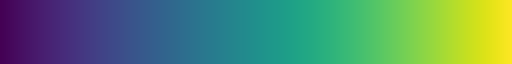

In [362]:
# Set seaborn themes
sns.set_theme(style='white')
sns.color_palette('viridis', as_cmap=True)

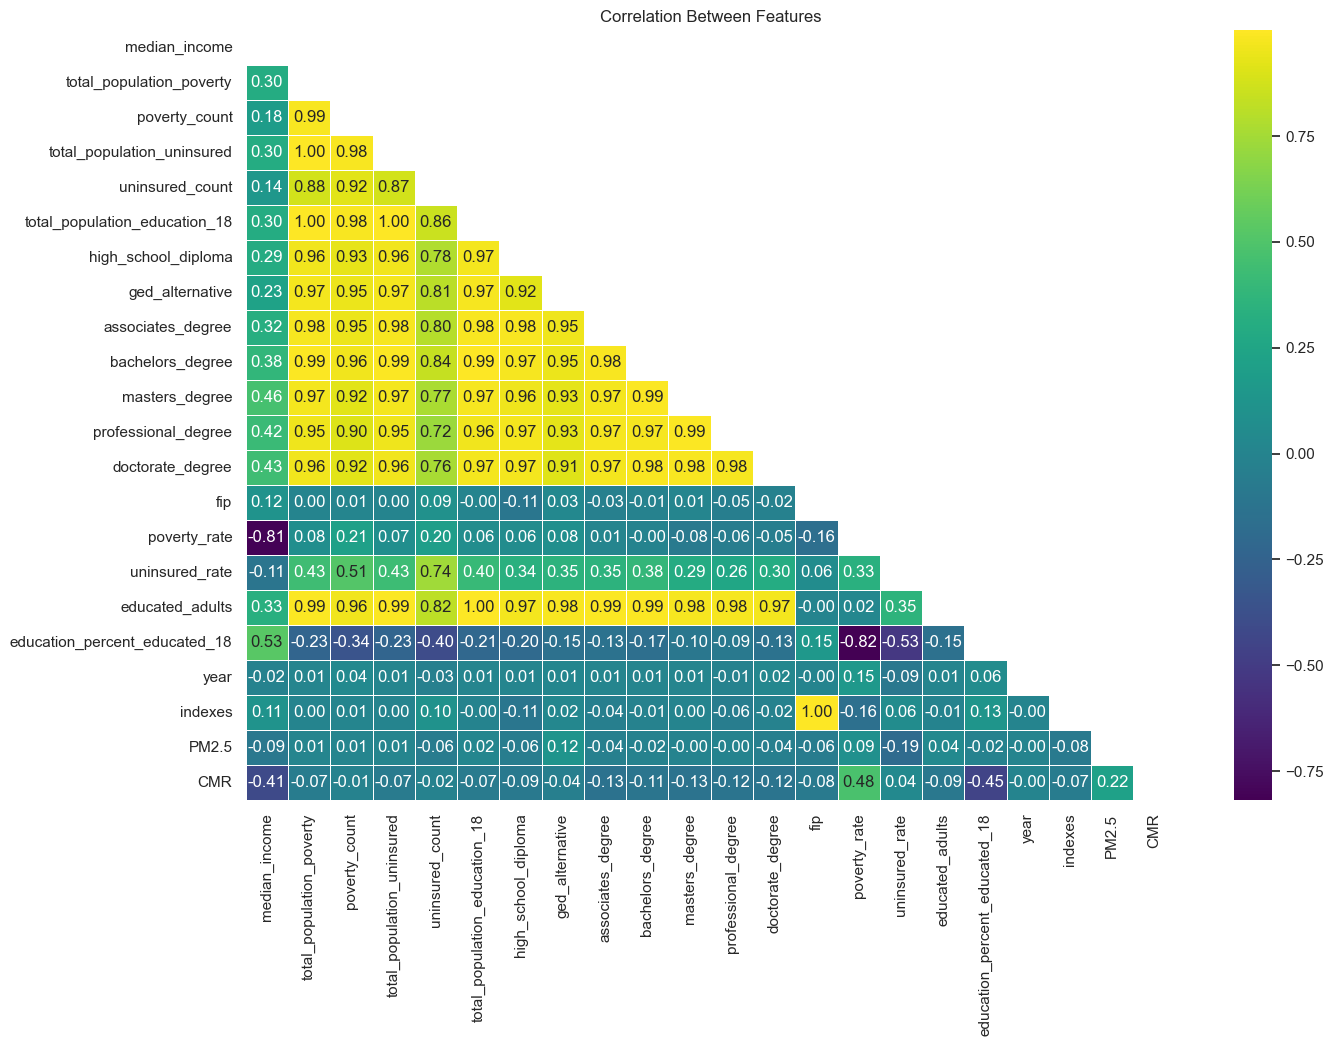

In [363]:
# Create the plot
plt.figure(figsize=(15,10))
matrix = df_acs_pm25_cmr_ses_index_state_combinedCorr
mask = np.triu(np.ones_like(matrix, dtype=float))
sns.heatmap(df_acs_pm25_cmr_ses_index_state_combinedCorr,
           annot=True,
           linewidths=.5,
           cmap='viridis',
           fmt= '.2f',
           mask=mask)

# Specify the name of the plot
plt.title('Correlation Between Features')
plt.show()

In [364]:
df_annualcounty_pm25_cmrCorr = df_annualcounty_pm25_cmr.corr(numeric_only=True)
df_annualcounty_pm25_cmrCorr

indexes          FIPS          Year     PM2.5       CMR  \
indexes    1.000000  9.963494e-01  4.685111e-04 -0.048550 -0.022501   
FIPS       0.996349  1.000000e+00 -9.848765e-14 -0.031119 -0.027027   
Year       0.000469 -9.848765e-14  1.000000e+00 -0.331087 -0.634749   
PM2.5     -0.048550 -3.111911e-02 -3.310874e-01  1.000000  0.409177   
CMR       -0.022501 -2.702650e-02 -6.347487e-01  0.409177  1.000000   
fip_state  0.996176  9.999749e-01 -9.886661e-14 -0.031918 -0.027712   

              fip_state  
indexes    9.961756e-01  
FIPS       9.999749e-01  
Year      -9.886661e-14  
PM2.5     -3.191807e-02  
CMR       -2.771248e-02  
fip_state  1.000000e+00

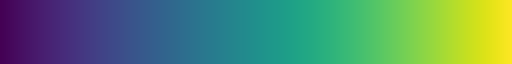

In [365]:
# Set seaborn themes
sns.set_theme(style='white')
sns.color_palette('viridis', as_cmap=True)

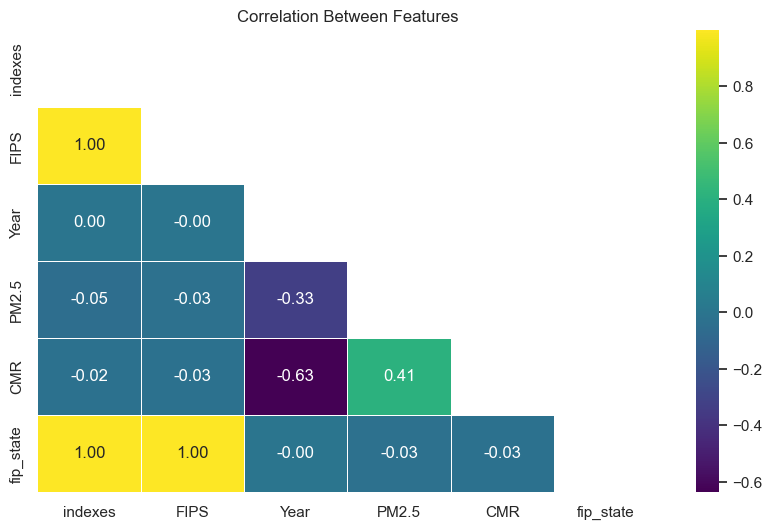

In [366]:
# Create the plot
plt.figure(figsize=(10,6))
matrix = df_annualcounty_pm25_cmrCorr
mask = np.triu(np.ones_like(matrix, dtype=float))
sns.heatmap(df_annualcounty_pm25_cmrCorr,
           annot=True,
           linewidths=.5,
           cmap='viridis',
           fmt= '.2f',
           mask=mask)

# Specify the name of the plot
plt.title('Correlation Between Features')
plt.show()

There is a weak positive correlation between PM2.5 and CMR with r of 0.41 which suggests that higher air pollution and higher particulate matter 2.5 levels are slightly associated to cardiovascular mortality risk.

There is a moderately strong correlation between Year and CMR with r of -0.63 which suggests a possible decline in the trend of cardiovascular mortality over time.

In [372]:
df_acs_2009_2010_statesCorr = df_acs_2009_2010_states.corr(numeric_only=True)
df_acs_2009_2010_statesCorr

median_income  total_population_poverty  \
median_income                       1.000000                  0.086735   
total_population_poverty            0.086735                  1.000000   
poverty_count                      -0.082466                  0.974114   
total_population_uninsured          0.086978                  0.999987   
uninsured_count                     0.016100                  0.881615   
total_population_education_18       0.088834                  0.999021   
high_school_diploma                 0.094396                  0.974658   
ged_alternative                     0.029094                  0.968151   
associates_degree                   0.091468                  0.984661   
bachelors_degree                    0.171221                  0.992389   
masters_degree                      0.243074                  0.971875   
professional_degree                 0.205382                  0.968589   
doctorate_degree                    0.241160                  0.963353   
fip                                -0.272823                 -0.091642   
poverty_rate                       -0.787880                  0.052446   
uninsured_rate                     -0.135005                  0.184942   
educated_adults                     0.117322                  0.993545   
education_percent_educated_18       0.674114                 -0.199924   
year                               -0.024800                  0.003340   

                               poverty_count  total_population_uninsured  \
median_income                      -0.082466                    0.086978   
total_population_poverty            0.974114                    0.999987   
poverty_count                       1.000000                    0.973791   
total_population_uninsured          0.973791                    1.000000   
uninsured_count                     0.899034                    0.880044   
total_population_education_18       0.969899                    0.999120   
high_school_diploma                 0.944622                    0.974395   
ged_alternative                     0.939316                    0.968882   
associates_degree                   0.951577                    0.984754   
bachelors_degree                    0.947816                    0.992442   
masters_degree                      0.910336                    0.972258   
professional_degree                 0.911074                    0.969046   
doctorate_degree                    0.904775                    0.963528   
fip                                -0.040103                   -0.091305   
poverty_rate                        0.244837                    0.051787   
uninsured_rate                      0.224732                    0.182550   
educated_adults                     0.953465                    0.993918   
education_percent_educated_18      -0.352352                   -0.197950   
year                                0.030270                    0.003760   

                               uninsured_count  total_population_education_18  \
median_income                         0.016100                       0.088834   
total_population_poverty              0.881615                       0.999021   
poverty_count                         0.899034                       0.969899   
total_population_uninsured            0.880044                       0.999120   
uninsured_count                       1.000000                       0.867637   
total_population_education_18         0.867637                       1.000000   
high_school_diploma                   0.839264                       0.974870   
ged_alternative                       0.816761                       0.974817   
associates_degree                     0.840703                       0.987620   
bachelors_degree                      0.852090                       0.992557   
masters_degree                        0.793491                       0.974602   
professional_degree                   0.779371           

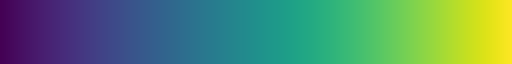

In [373]:
# Set seaborn themes
sns.set_theme(style='white')
sns.color_palette('viridis', as_cmap=True)

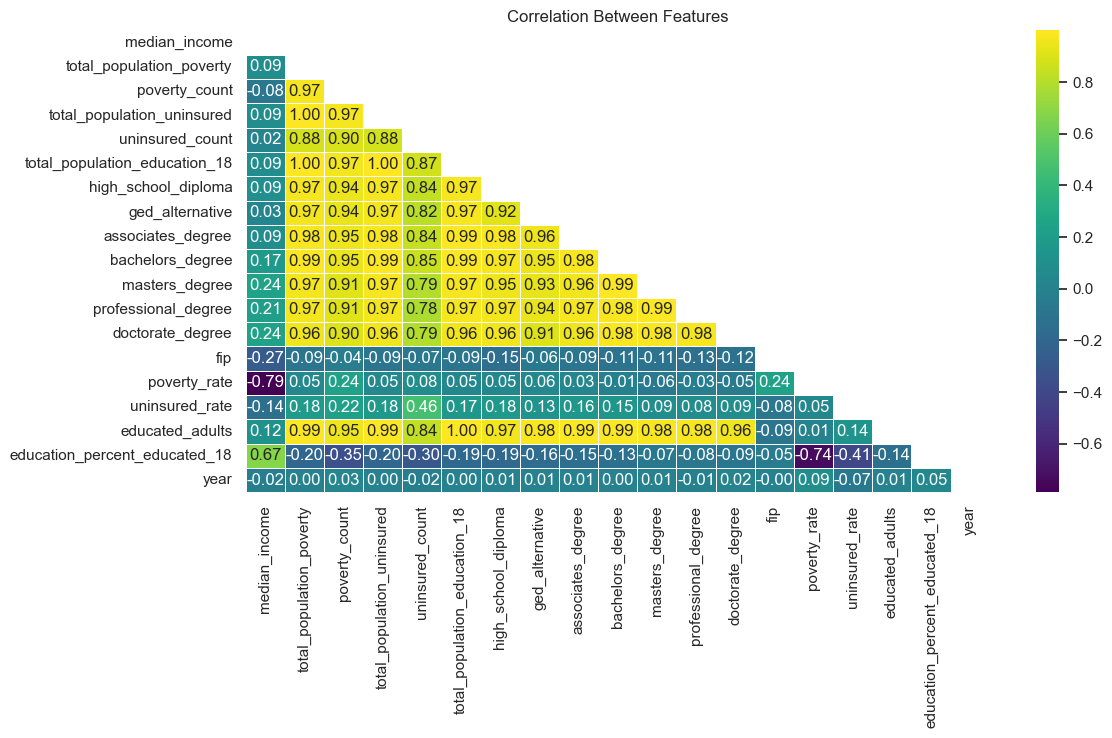

In [374]:
# Create the plot
plt.figure(figsize=(12,6))
matrix = df_acs_2009_2010_statesCorr
mask = np.triu(np.ones_like(matrix, dtype=float))
sns.heatmap(df_acs_2009_2010_statesCorr,
           annot=True,
           linewidths=.5,
           cmap='viridis',
           fmt= '.2f',
           mask=mask)

# Specify the name of the plot
plt.title('Correlation Between Features')
plt.show()

There is a strong negative correlation between poverty rate and median income with r of -0.79 which means higher poverty leads to lower income.

There is a strong negative correlation between high schooleducation percentage and poverty rate with r of -0.74 which could mean higher education leads to lower poverty rates

There is a weak positive correlations between uninsured rate and total population in poverty count with r of 0.18 which means an increase in health uninsurance rate as the total population in poverty increases.

There is a strong positive correlation between median income and higher education rate with r of 0.67 which means higher education leads to higher income.

In [376]:
df_merged_state_countyCorr = df_merged_state_county.corr(numeric_only=True)
df_merged_state_countyCorr

Year     PM2.5       CMR           fip  \
Year            1.000000e+00 -0.001503 -0.041523  2.099537e-15   
PM2.5          -1.502806e-03  1.000000  0.217155 -6.084630e-02   
CMR            -4.152323e-02  0.217155  1.000000 -7.690878e-02   
fip             2.099537e-15 -0.060846 -0.076909  1.000000e+00   
SES_index_1990 -6.260400e-16 -0.133021  0.564663 -4.534023e-02   
SES_index_2000  3.908541e-16 -0.145436  0.493042 -5.889890e-02   
SES_index_2010  3.638012e-16  0.042922  0.520374 -1.155119e-01   

                SES_index_1990  SES_index_2000  SES_index_2010  
Year             -6.260400e-16    3.908541e-16    3.638012e-16  
PM2.5            -1.330209e-01   -1.454356e-01    4.292238e-02  
CMR               5.646635e-01    4.930415e-01    5.203737e-01  
fip              -4.534023e-02   -5.889890e-02   -1.155119e-01  
SES_index_1990    1.000000e+00    8.947814e-01    7.909648e-01  
SES_index_2000    8.947814e-01    1.000000e+00    8.845828e-01  
SES_index_2010    7.909648e-01    8.845828e-01    1.000000e+00

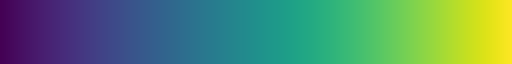

In [377]:
# Set seaborn themes
sns.set_theme(style='white')
sns.color_palette('viridis', as_cmap=True)

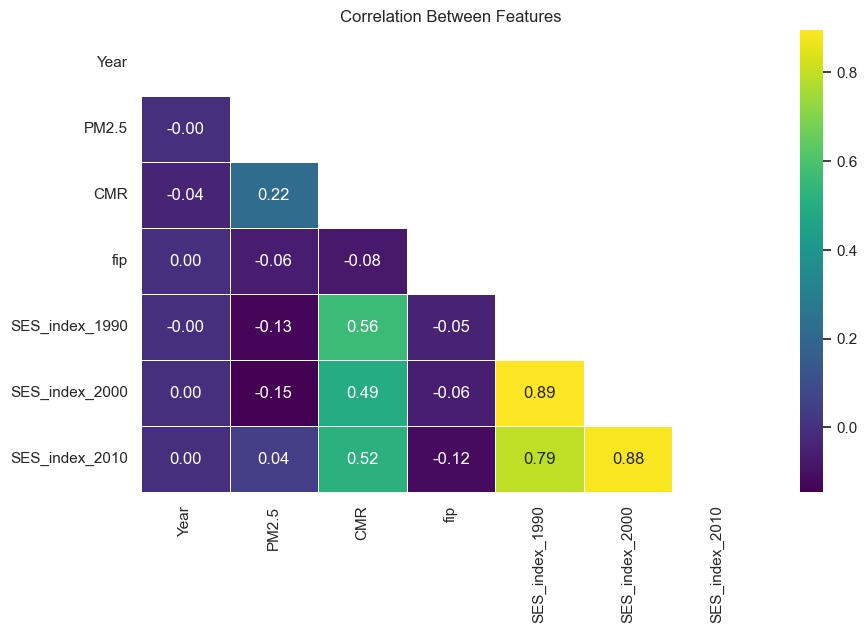

In [378]:
# Create the plot
plt.figure(figsize=(10,6))
matrix = df_merged_state_countyCorr
mask = np.triu(np.ones_like(matrix, dtype=float))
sns.heatmap(df_merged_state_countyCorr,
           annot=True,
           linewidths=.5,
           cmap='viridis',
           fmt= '.2f',
           mask=mask)

# Specify the name of the plot
plt.title('Correlation Between Features')
plt.show()

In [ ]:
Its worth noting that this heat map suggests from the correlation values socio-economic index and cardiomortality rate that the the cardiomortality rate increases as socioeconomic status index increases and this is in contrast to research that suggests that a higher socioeconomic status is associated with a lower CMR due to better health habits and healthcare access.

In [379]:
df_merged_state_county.head()

FIPS  Year     PM2.5         CMR  fip state  SES_index_1990  \
0  1001  2009  6.402091  330.876172    1    AL       -0.079387   
1  1001  2010  6.942778  316.911479    1    AL       -0.079387   
2  1003  2009  5.419087  270.402216    1    AL       -0.187240   
3  1003  2010  5.837704  276.377191    1    AL       -0.187240   
4  1005  2009  5.840124  383.159080    1    AL        1.279538   

   SES_index_2000  SES_index_2010 SES_quintile_1990 SES_quintile_2000  \
0       -0.322846       -0.405150                Q3                Q3   
1       -0.322846       -0.405150                Q3                Q3   
2       -0.467794       -0.403987                Q3                Q2   
3       -0.467794       -0.403987                Q3                Q2   
4        2.013751        1.740142                Q5                Q5   

  SES_quintile_2010  
0                Q2  
1                Q2  
2                Q2  
3                Q2  
4                Q5

In [380]:
# Hypothesis test
from scipy.stats import ttest_ind

# Hypothesis: States/Counties with higher PM2.5 levels have higher CMR
high_pm25 = df_merged_state_county[df_merged_state_county['PM2.5'] > df_merged_state_county['PM2.5'].median()]['CMR']
low_pm25 = df_merged_state_county[df_merged_state_county['PM2.5'] <= df_merged_state_county['PM2.5'].median()]['CMR']

# Perform t-test
t_stat, p_value = ttest_ind(high_pm25, low_pm25)
print(f"t-statistic: {t_stat}, p-value: {p_value}")

t-statistic: 7.1673660317328, p-value: 8.96756932006852e-13


There is a statistically significant difference in the mean CMR between states/counties with high PM2.5 levels and those with low PM2.5 levels.

Regression analysis?

In [381]:
#Explain merged county corr plot

In [382]:
import bokeh as bk
from bokeh.layouts import column
from bokeh.plotting import figure, output_file, show, curdoc
from bokeh.io import output_notebook, push_notebook, show
from bokeh.models import Scatter, ColumnDataSource, Div, RangeSlider, Spinner, CustomJS
# apply theme to current document
curdoc().theme = 'light_minimal'

In [383]:
df_acs_2009_2010_states.head(2)

state  median_income  total_population_poverty  poverty_count  \
0    AL          40489                   4588899         804683   
1    AK          66953                    682412          61653   

   total_population_uninsured  uninsured_count  total_population_education_18  \
0                     4616028            66730                        3115982   
1                      678081            24993                         431178   

   high_school_diploma  ged_alternative  associates_degree  bachelors_degree  \
0                27958           464551              88341            211422   
1                 4388            68535              15906             34369   

   masters_degree  professional_degree  doctorate_degree  fip  poverty_rate  \
0           68352                26346             18412    1     17.535426   
1           13071                 3876              2806    2      9.034571   

   uninsured_rate  educated_adults  education_percent_educated_18  year  
0        1.445615           905382                      29.056073  2009  
1        3.685843           142951                      33.153593  2009

In [384]:
df_annualcounty_pm25_cmr.head(2)

indexes  FIPS  Year     PM2.5         CMR  fip_state state
0        1  1001  1990  9.749792  471.758888          1    AL
1        2  1001  1991  9.069443  456.869651          1    AL

# Revised Research Questions:

#### What is the association between air pollution(PM2.5), socioeconomic factors (poverty, education, and health insurance) and cardiovascular mortality rates across some sample U.S. states?

#### How does hypertension prevalence impact cardiovascular mortality rates in some sample U.S. states?

### Associations between socioeconomic factors (poverty, education, and health insurance) and cardiovascular mortality rates across some U.S. states

In [598]:
#Correlation Analysis
df_acs_pm25_cmr_ses_index_state_combinedCorr = df_acs_pm25_cmr_ses_index_state_combined[['poverty_rate', 'uninsured_rate','education_percent_educated_18', 'PM2.5','CMR']].corr()
df_acs_pm25_cmr_ses_index_state_combinedCorr

poverty_rate  uninsured_rate  \
poverty_rate                       1.000000        0.334071   
uninsured_rate                     0.334071        1.000000   
education_percent_educated_18     -0.819114       -0.526880   
PM2.5                              0.089386       -0.188801   
CMR                                0.480801        0.038895   

                               education_percent_educated_18     PM2.5  \
poverty_rate                                       -0.819114  0.089386   
uninsured_rate                                     -0.526880 -0.188801   
education_percent_educated_18                       1.000000 -0.015735   
PM2.5                                              -0.015735  1.000000   
CMR                                                -0.452091  0.217155   

                                    CMR  
poverty_rate                   0.480801  
uninsured_rate                 0.038895  
education_percent_educated_18 -0.452091  
PM2.5                          0.217155  
CMR                            1.000000

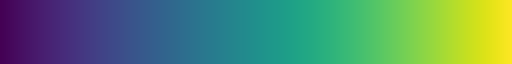

In [600]:
# Set seaborn themes
sns.set_theme(style='white')
sns.color_palette('viridis', as_cmap=True)

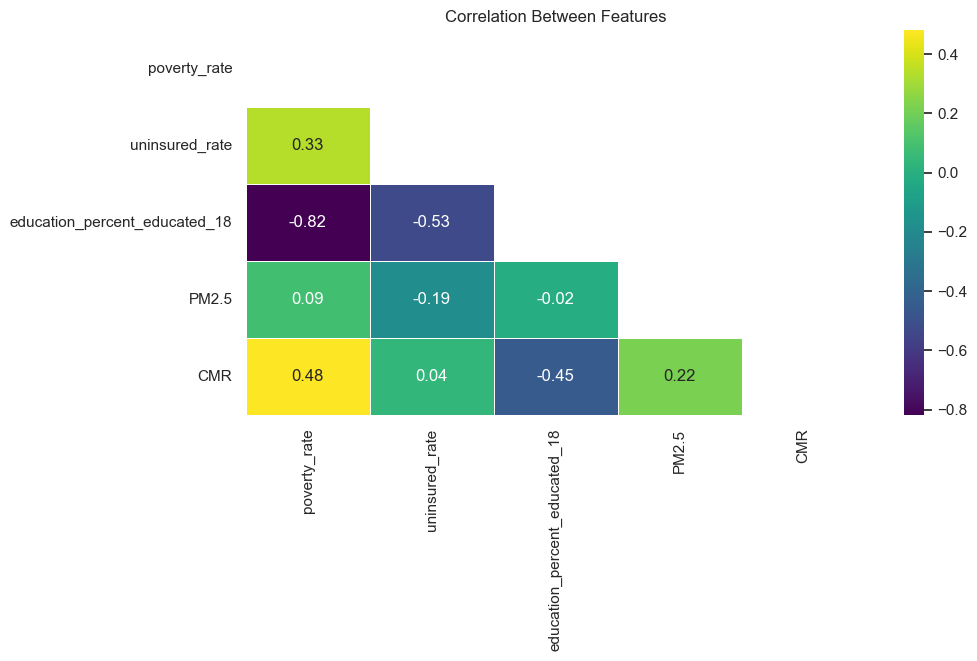

In [602]:
# Create the plot
plt.figure(figsize=(10,5))
matrix = df_acs_pm25_cmr_ses_index_state_combinedCorr
mask = np.triu(np.ones_like(matrix, dtype=float))
sns.heatmap(df_acs_pm25_cmr_ses_index_state_combinedCorr,
           annot=True,
           linewidths=.5,
           cmap='viridis',
           fmt= '.2f',
           mask=mask)

# Specify the name of the plot
plt.title('Correlation Between Features')
plt.show()

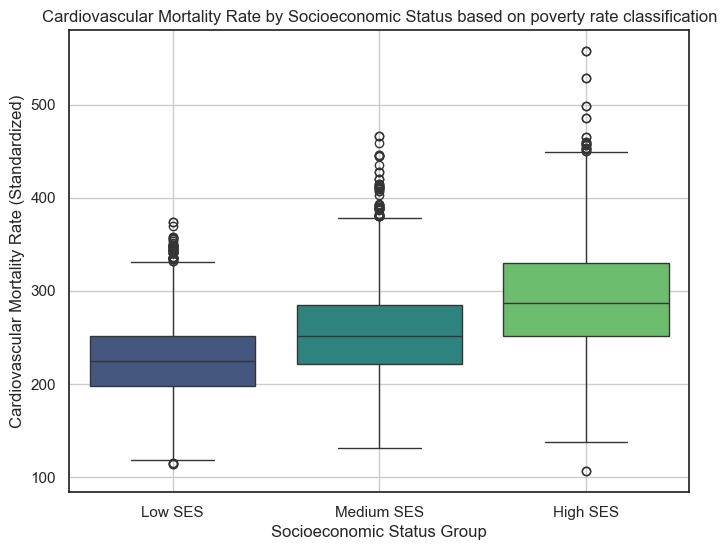

In [467]:
# Categorize states into Low, Medium, High SES Groups
df_acs_pm25_cmr_ses_index_state_combined['SES_Group'] = pd.qcut(df_acs_pm25_cmr_ses_index_state_combined['poverty_rate'], q=3, labels=['Low SES', 'Medium SES', 'High SES'])

# Boxplot
plt.figure(figsize=(8,6))
sns.boxplot(data=df_acs_pm25_cmr_ses_index_state_combined, x="SES_Group", y="CMR", palette="viridis")
plt.title("Cardiovascular Mortality Rate by Socioeconomic Status based on poverty rate classification")
plt.xlabel("Socioeconomic Status Group")
plt.ylabel("Cardiovascular Mortality Rate (Standardized)")
plt.grid(True)
plt.show()

Pairplots and Correlation Heatmap: These visualizations illustrate the relationships between socioeconomic variables and CMR. 
Boxplots on SES and CMR: They reveal systematic biases in health outcomes across socioeconomic groups. 

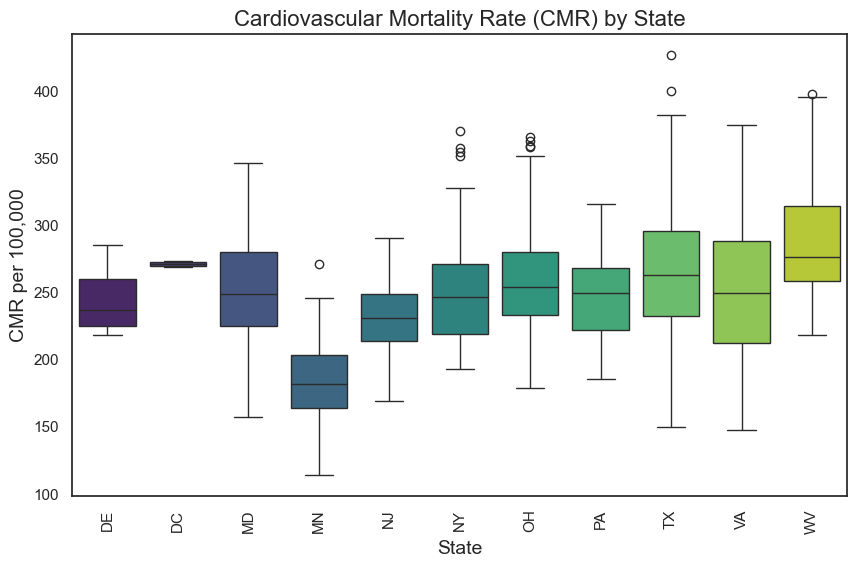

In [649]:
# States of interest
states = ['DC', 'MD', 'VA', 'WV', 'PA', 'DE', 'MN', 'NY', 'NJ', 'TX', 'OH']
df_filtered = df_merged_state_county[df_merged_state_county['state'].isin(states)]

# Boxplot by State
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='state',
    y='CMR',
    data=df_filtered,
    palette='viridis'
)
plt.title('Cardiovascular Mortality Rate (CMR) by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('CMR per 100,000', fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [636]:
df_cvd_htn_mort_combined_reup.head()

YEAR state  Cvdmortrate  Cvddeathcount  \
0  2022    AL        234.2          14958   
1  2022    AK        145.7           1013   
2  2022    AZ        148.5          14593   
3  2022    AR        224.1           8664   
4  2022    CA        142.4          66340   

                                URL_cvdmort  Htndxdeathrate  Htndxdeathcount  \
0     /nchs/pressroom/states/alabama/al.htm            13.2              849   
1      /nchs/pressroom/states/alaska/ak.htm             8.6               56   
2     /nchs/pressroom/states/arizona/az.htm            11.3             1109   
3    /nchs/pressroom/states/arkansas/ar.htm            12.1              454   
4  /nchs/pressroom/states/california/ca.htm            14.4             6727   

                                URL_htnmort  
0     /nchs/pressroom/states/alabama/al.htm  
1      /nchs/pressroom/states/alaska/ak.htm  
2     /nchs/pressroom/states/arizona/az.htm  
3    /nchs/pressroom/states/arkansas/ar.htm  
4  /nchs/pressroom/states/california/ca.htm

In [387]:
df_cvd_htn_mort_combined_reup['Cvddeathcount'] = (
    df_cvd_htn_mort_combined_reup['Cvddeathcount']
    .astype(str)              
    .str.replace(',', '', regex=False) )
    # Convert to numeric
    
df_cvd_htn_mort_combined_reup['Cvddeathcount'] = pd.to_numeric(
    df_cvd_htn_mort_combined_reup['Cvddeathcount'], errors='coerce'
)

In [388]:
df_cvd_htn_mort_combined_reup['Htndxdeathcount'] = (
    df_cvd_htn_mort_combined_reup['Htndxdeathcount']
    .astype(str)                
    .str.replace(',', '', regex=False) )
    # Convert to numeric
    
df_cvd_htn_mort_combined_reup['Htndxdeathcount'] = pd.to_numeric(
    df_cvd_htn_mort_combined_reup['Htndxdeathcount'], errors='coerce'
)



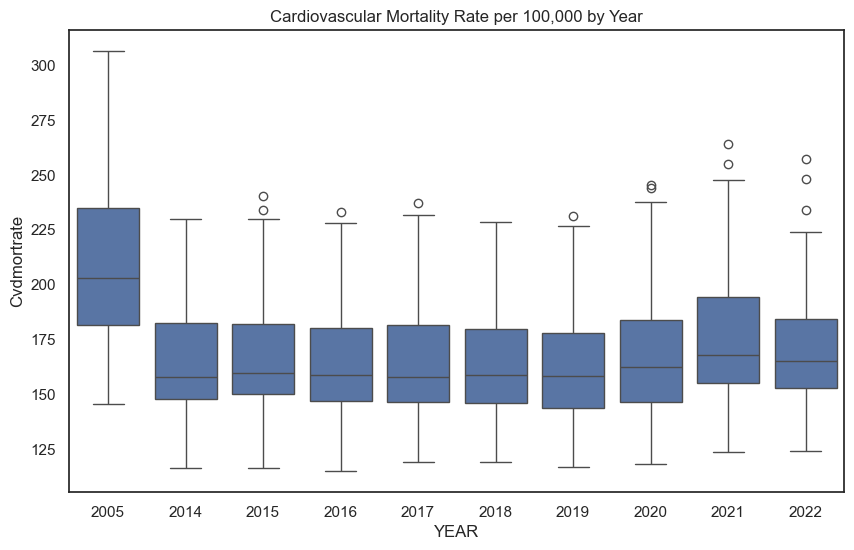

In [389]:
#Box plot by Year
plt.figure(figsize=(10, 6))
sns.boxplot(x='YEAR', y='Cvdmortrate', data=df_cvd_htn_mort_combined_reup)
plt.title('Cardiovascular Mortality Rate per 100,000 by Year')
plt.show()

In [ ]:
#Multiple Regression
import statsmodels.api as sm 

# independent variables and dependent variable 
X = df_acs_pm25_cmr_ses_index_state_combined[['poverty_rate', 'uninsured_rate','education_percent_educated_18']]
y = df_acs_pm25_cmr_ses_index_state_combined['CMR']

# intercept constant
X = sm.add_constant(X)

# Fitting
model = sm.OLS(y, X).fit()

# Display results
print(model.summary())

In [479]:
df_acs_pm25_cmr_ses_index_state_combined.head()

state  median_income  total_population_poverty  poverty_count  \
0    AL          40489                   4588899         804683   
1    AL          40489                   4588899         804683   
2    AL          40489                   4588899         804683   
3    AL          40489                   4588899         804683   
4    AL          40489                   4588899         804683   

   total_population_uninsured  uninsured_count  total_population_education_18  \
0                     4616028            66730                        3115982   
1                     4616028            66730                        3115982   
2                     4616028            66730                        3115982   
3                     4616028            66730                        3115982   
4                     4616028            66730                        3115982   

   high_school_diploma  ged_alternative  associates_degree  bachelors_degree  \
0                27958           464551              88341            211422   
1                27958           464551              88341            211422   
2                27958           464551              88341            211422   
3                27958           464551              88341            211422   
4                27958           464551              88341            211422   

   masters_degree  professional_degree  doctorate_degree  fip  poverty_rate  \
0           68352                26346             18412    1     17.535426   
1           68352                26346             18412    1     17.535426   
2           68352                26346             18412    1     17.535426   
3           68352                26346             18412    1     17.535426   
4           68352                26346             18412    1     17.535426   

   uninsured_rate  educated_adults  education_percent_educated_18  year  \
0        1.445615           905382                      29.056073  2009   
1        1.445615           905382                      29.056073  2009   
2        1.445615           905382                      29.056073  2009   
3        1.445615           905382                      29.056073  2009   
4        1.445615           905382                      29.056073  2009   

   indexes  FIPS     PM2.5         CMR SES_Group  
0       20  1001  6.402091  330.876172  High SES  
1       21  1001  6.942778  316.911479  High SES  
2       41  1003  5.419087  270.402216  High SES  
3       42  1003  5.837704  276.377191  High SES  
4       62  1005  5.840124  383.159080  High SES

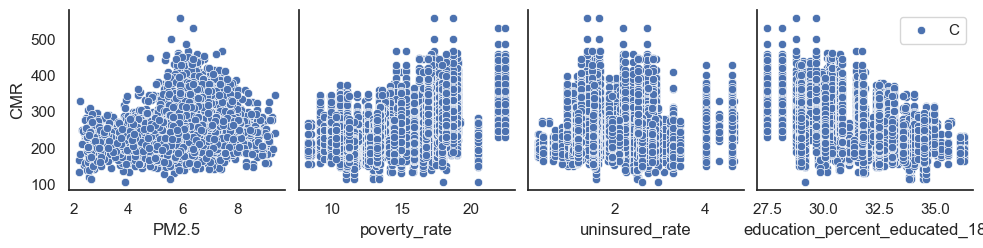

In [523]:
sns.pairplot(
    df_acs_pm25_cmr_ses_index_state_combined,
    x_vars=["PM2.5", "poverty_rate", "uninsured_rate","education_percent_educated_18"],
    y_vars=["CMR"]
)

#plt.legend("CMR compared to socioeconomic factors")

plt.show()

This pairplot provides a matrix of scatter plots, examining how different socioeconomic factors (poverty, education, insurance) relate to Cardiomortality rate (CMR).

The pairwise relationships shows that higher pm2.5 rates may be associated with increased CMR.

The pairwise relationships shows that lower education and higher poverty rates may be associated with increased CMR.

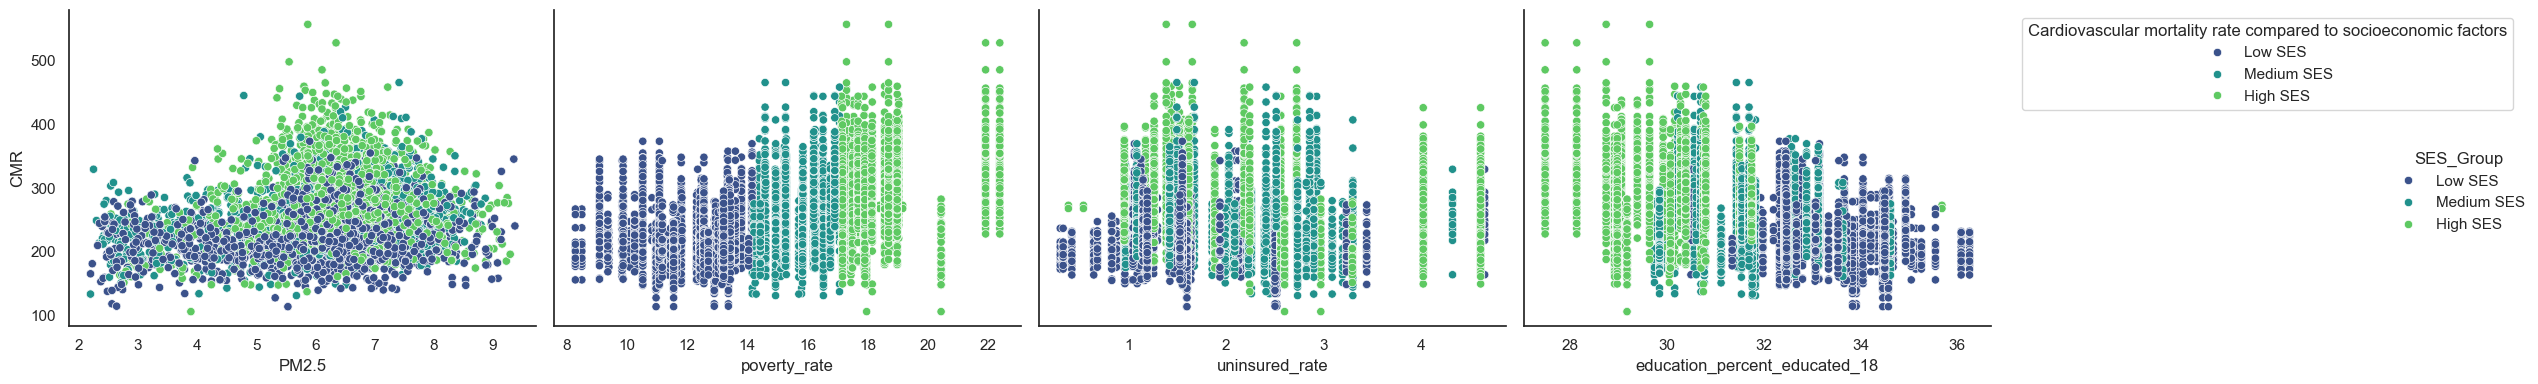

In [509]:
sns.pairplot(
    df_acs_pm25_cmr_ses_index_state_combined,
    x_vars=["PM2.5", "poverty_rate", "uninsured_rate","education_percent_educated_18"],
    y_vars=["CMR"],
    hue="SES_Group",  
    palette="viridis" ,
    height=4,  
    aspect=1.5 
)

# Add a legend
plt.legend(title="Cardiovascular mortality rate compared to socioeconomic factors", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [676]:
df_acs_pm25_cmr_ses_index_state_combined.tail(30)

state  median_income  total_population_poverty  poverty_count  \
8498    WI          49001                   5535803         731479   
8499    WI          49001                   5535803         731479   
8500    WI          49001                   5535803         731479   
8501    WI          49001                   5535803         731479   
8502    WY          53512                    551120          61577   
8503    WY          53512                    551120          61577   
8504    WY          53512                    551120          61577   
8505    WY          53512                    551120          61577   
8506    WY          53512                    551120          61577   
8507    WY          53512                    551120          61577   
8508    WY          53512                    551120          61577   
8509    WY          53512                    551120          61577   
8510    WY          53512                    551120          61577   
8511    WY          53512                    551120          61577   
8512    WY          53512                    551120          61577   
8513    WY          53512                    551120          61577   
8514    WY          53512                    551120          61577   
8515    WY          53512                    551120          61577   
8516    WY          53512                    551120          61577   
8517    WY          53512                    551120          61577   
8518    WY          53512                    551120          61577   
8519    WY          53512                    551120          61577   
8520    WY          53512                    551120          61577   
8521    WY          53512                    551120          61577   
8522    WY          53512                    551120          61577   
8523    WY          53512                    551120          61577   
8524    WY          53512                    551120          61577   
8525    WY          53512                    551120          61577   
8526    WY          53512                    551120          61577   
8527    WY          53512                    551120          61577   

      total_population_uninsured  uninsured_count  \
8498                     5613402            67110   
8499                     5613402            67110   
8500                     5613402            67110   
8501                     5613402            67110   
8502                      555010            10768   
8503                      555010            10768   
8504                      555010            10768   
8505                      555010            10768   
8506                      555010            10768   
8507                      555010            10768   
8508                      555010            10768   
8509                      555010            10768   
8510                      555010            10768   
8511                      555010            10768   
8512                      555010            10768   
8513                      555010            10768   
8514                      555010            10768   
8515                      555010            10768   
8516                      555010            10768   
8517                      555010            10768   
8518                      555010            10768   
8519                      555010            10768   
8520                      555010            10768   
8521                      555010            10768   
8522                      555010            10768   
8523                      555010            10768   
8524                      555010            10768   
8525                      555010            10768   
8526                      555010            10768   
8527                      555010            10768   

      total_population_education_18  high_school_diploma  ged_alternative  \
8498                        3800295                32669           637173   
8499                        3800295 

Scatter Plots of CMR in relation to PM2.5 and Socioeconomic Indicators: These plots demonstrate that environmental and social determinants impact health.

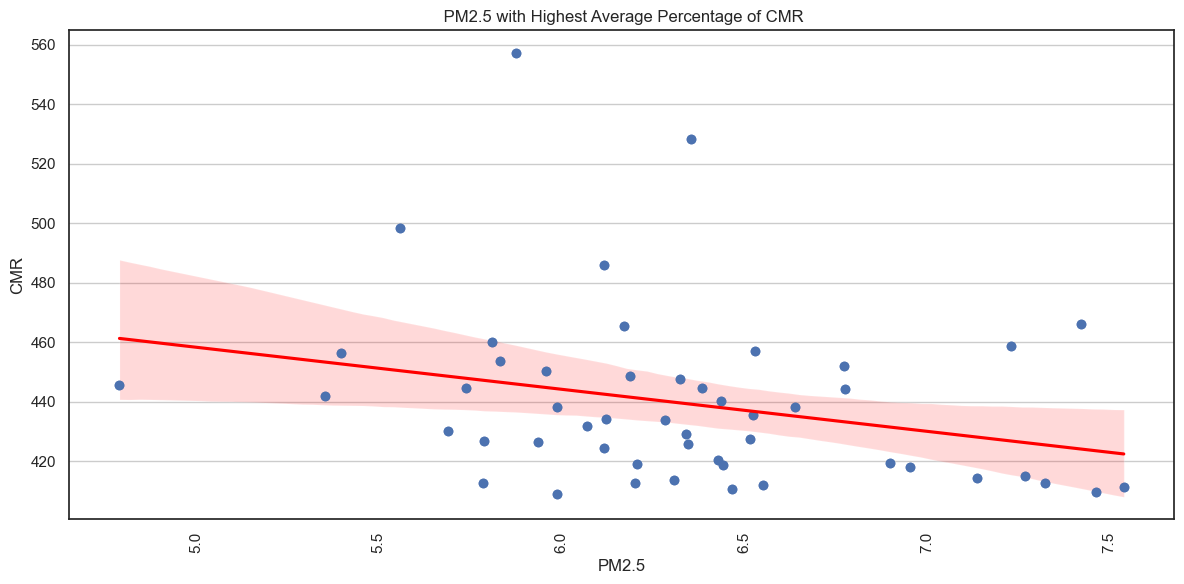

In [668]:
# Group by variable1 and calculate the average percentage of variable2 for each variable1
averageVariable1 = df_acs_pm25_cmr_ses_index_state_combined.groupby('PM2.5')['CMR'].mean()

# Sort variable1 based on the highest average percentage of variable2
maxVariable1 = averageVariable1.sort_values(ascending=False).head(50)

# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.regplot(x=maxVariable1.index, y=maxVariable1.values, scatter=True, line_kws={'color': 'red'})
plt.scatter(maxVariable1.index, maxVariable1.values)
plt.xlabel('PM2.5')
plt.ylabel('CMR')
plt.title(' PM2.5 with Highest Average Percentage of CMR')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
# Show the visualization
plt.show()

This plot explores the impact of air pollution (PM2.5) on cardiovascular mortality.

Higher PM2.5 levels appear to be linked to an increase in CMR when variables are standardized, reinforcing environmental concerns in cardiovascular health. But higher PM2.5 levels appear to be linked to a decrease in CMR when variables are averaged.

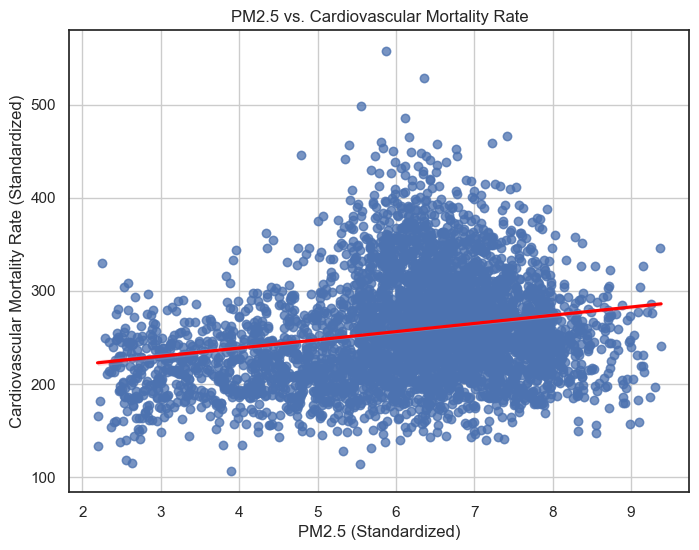

In [666]:
# Scatter Plot: PM2.5 vs Cardiovascular Mortality Rate
plt.figure(figsize=(8,6))
sns.regplot(data=df_acs_pm25_cmr_ses_index_state_combined, x="PM2.5", y="CMR", scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("PM2.5 vs. Cardiovascular Mortality Rate")
plt.xlabel("PM2.5 (Standardized)")
plt.ylabel("Cardiovascular Mortality Rate (Standardized)")
plt.grid(True)
plt.show()

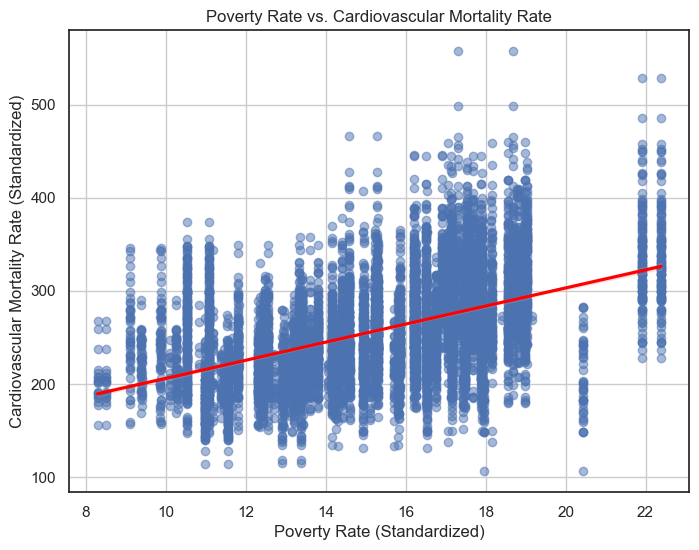

In [654]:
# Scatter Plot: Poverty Rate vs Cardiovascular Mortality Rate
plt.figure(figsize=(8,6))
sns.regplot(data=df_acs_pm25_cmr_ses_index_state_combined, x="poverty_rate", y="CMR", scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Poverty Rate vs. Cardiovascular Mortality Rate")
plt.xlabel("Poverty Rate (Standardized)")
plt.ylabel("Cardiovascular Mortality Rate (Standardized)")
plt.grid(True)
plt.show()

This scatter plot examines the correlation between the poverty rate and cardiovascular mortality rates.

The plot shows a positive correlation, indicating that states with higher poverty rates might experience increased cardiovascular mortality rates.

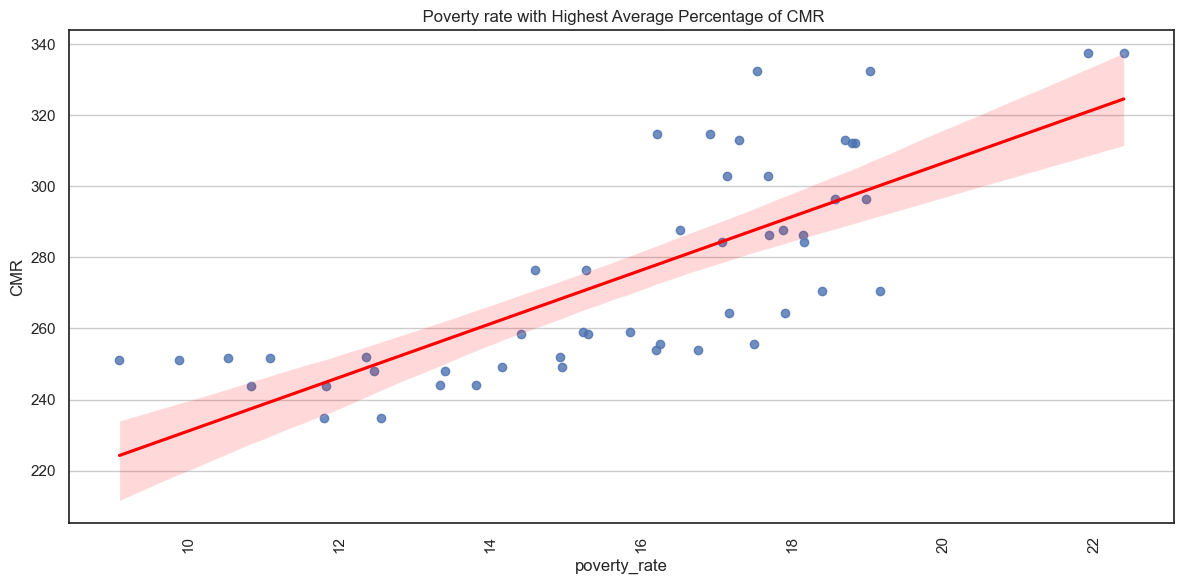

In [437]:
# Group by variable1 and calculate the average percentage of variable2 for each variable1
averageVariable1 = df_acs_pm25_cmr_ses_index_state_combined.groupby('poverty_rate')['CMR'].mean()

# Sort variable1 based on the highest average percentage of variable2
maxVariable1 = averageVariable1.sort_values(ascending=False).head(50)

# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.regplot(x=maxVariable1.index, y=maxVariable1.values, scatter=True, line_kws={'color': 'red'})
plt.xlabel('poverty_rate')
plt.ylabel('CMR')
plt.title(' Poverty rate with Highest Average Percentage of CMR')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
# Show the visualization
plt.show()

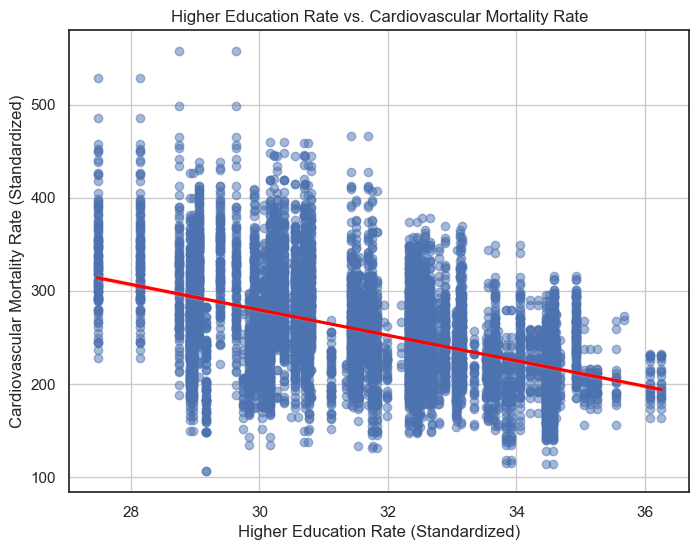

In [439]:
# Scatter Plot: Higher Education Rate vs Cardiovascular Mortality Rate
plt.figure(figsize=(8,6))
sns.regplot(data=df_acs_pm25_cmr_ses_index_state_combined, x="education_percent_educated_18", y="CMR", scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Higher Education Rate vs. Cardiovascular Mortality Rate")
plt.xlabel("Higher Education Rate (Standardized)")
plt.ylabel("Cardiovascular Mortality Rate (Standardized)")
plt.grid(True)
plt.show()

This scatter plot examines the correlation between the higher education rates and cardiovascular mortality rates.

The plot shows a potential negative correlation, indicating that states with higher educated citizen rates might experience decreased cardiovascular mortality rates.

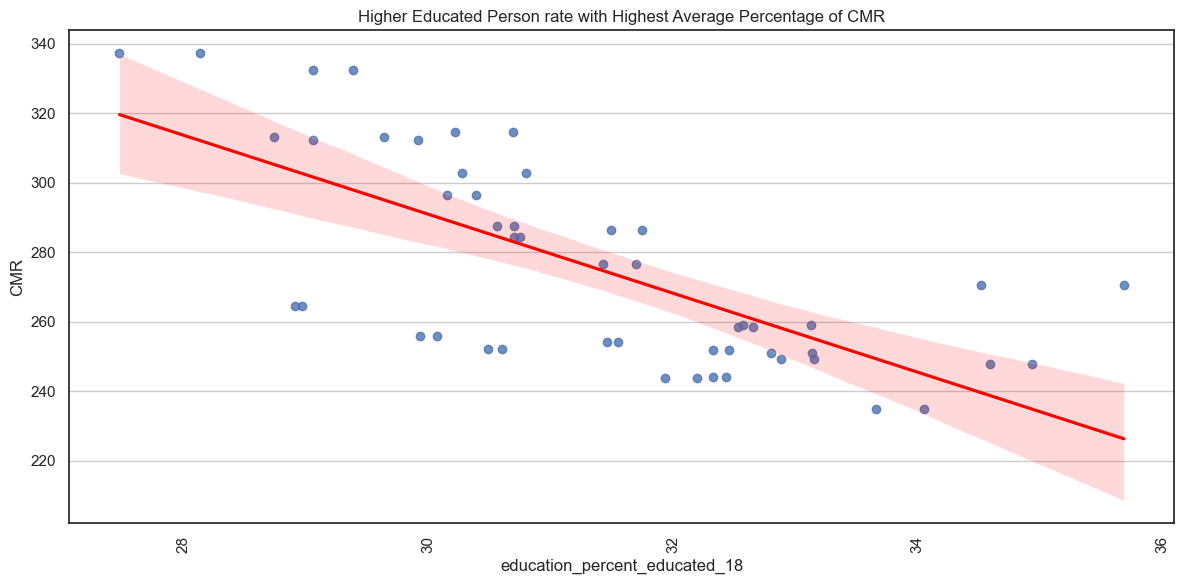

In [441]:
# Group  by variable1 and calculate the average percentage of variable2 for each variable1
averageVariable1 = df_acs_pm25_cmr_ses_index_state_combined.groupby('education_percent_educated_18')['CMR'].mean()

# Sort variable1 based on the highest average percentage of variable2
maxVariable1 = averageVariable1.sort_values(ascending=False).head(50)

# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.regplot(x=maxVariable1.index, y=maxVariable1.values, scatter=True, line_kws={'color': 'red'})
plt.xlabel('education_percent_educated_18')
plt.ylabel('CMR')
plt.title('Higher Educated Person rate with Highest Average Percentage of CMR')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
# Show the visualization
plt.show()

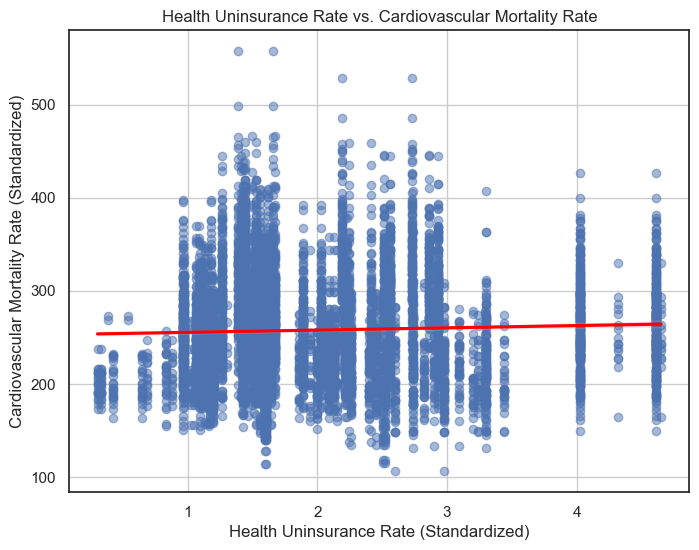

In [443]:
# Scatter Plot: Health Uninsurance Rate vs Cardiovascular Mortality Rate
plt.figure(figsize=(8,6))
sns.regplot(data=df_acs_pm25_cmr_ses_index_state_combined, x="uninsured_rate", y="CMR", scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Health Uninsurance Rate vs. Cardiovascular Mortality Rate")
plt.xlabel("Health Uninsurance Rate (Standardized)")
plt.ylabel("Cardiovascular Mortality Rate (Standardized)")
plt.grid(True)
plt.show()

This scatter plot examines the correlation between the uninsured rate and cardiovascular mortality rates.

The plot shows a potential positive correlation, indicating that states with higher uninsured rates might experience increased cardiovascular mortality rates.

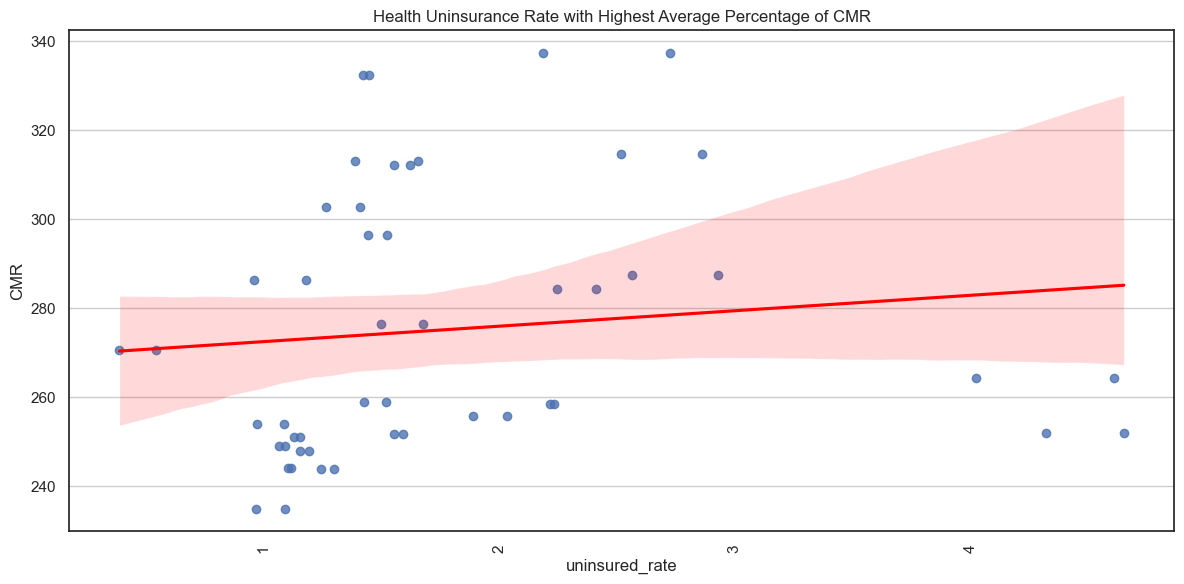

In [658]:
#Group by variable1 and calculate the average percentage of variable2 for each variable1
averageVariable1 = df_acs_pm25_cmr_ses_index_state_combined.groupby('uninsured_rate')['CMR'].mean()

# Sort variable1 based on the highest average percentage of variable2
maxVariable1 = averageVariable1.sort_values(ascending=False).head(50)

# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.regplot(x=maxVariable1.index, y=maxVariable1.values, scatter=True, line_kws={'color': 'red'})
plt.xlabel('uninsured_rate')
plt.ylabel('CMR')
plt.title('Health Uninsurance Rate with Highest Average Percentage of CMR')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
# Show the visualization
plt.show()

In [622]:
df_acs_pm25_cmr_ses_index_state_combined.head()

state  median_income  total_population_poverty  poverty_count  \
0    AL          40489                   4588899         804683   
1    AL          40489                   4588899         804683   
2    AL          40489                   4588899         804683   
3    AL          40489                   4588899         804683   
4    AL          40489                   4588899         804683   

   total_population_uninsured  uninsured_count  total_population_education_18  \
0                     4616028            66730                        3115982   
1                     4616028            66730                        3115982   
2                     4616028            66730                        3115982   
3                     4616028            66730                        3115982   
4                     4616028            66730                        3115982   

   high_school_diploma  ged_alternative  associates_degree  bachelors_degree  \
0                27958           464551              88341            211422   
1                27958           464551              88341            211422   
2                27958           464551              88341            211422   
3                27958           464551              88341            211422   
4                27958           464551              88341            211422   

   masters_degree  professional_degree  doctorate_degree  fip  poverty_rate  \
0           68352                26346             18412    1     17.535426   
1           68352                26346             18412    1     17.535426   
2           68352                26346             18412    1     17.535426   
3           68352                26346             18412    1     17.535426   
4           68352                26346             18412    1     17.535426   

   uninsured_rate  educated_adults  education_percent_educated_18  year  \
0        1.445615           905382                      29.056073  2009   
1        1.445615           905382                      29.056073  2009   
2        1.445615           905382                      29.056073  2009   
3        1.445615           905382                      29.056073  2009   
4        1.445615           905382                      29.056073  2009   

   indexes  FIPS     PM2.5         CMR SES_Group  
0       20  1001  6.402091  330.876172  High SES  
1       21  1001  6.942778  316.911479  High SES  
2       41  1003  5.419087  270.402216  High SES  
3       42  1003  5.837704  276.377191  High SES  
4       62  1005  5.840124  383.159080  High SES

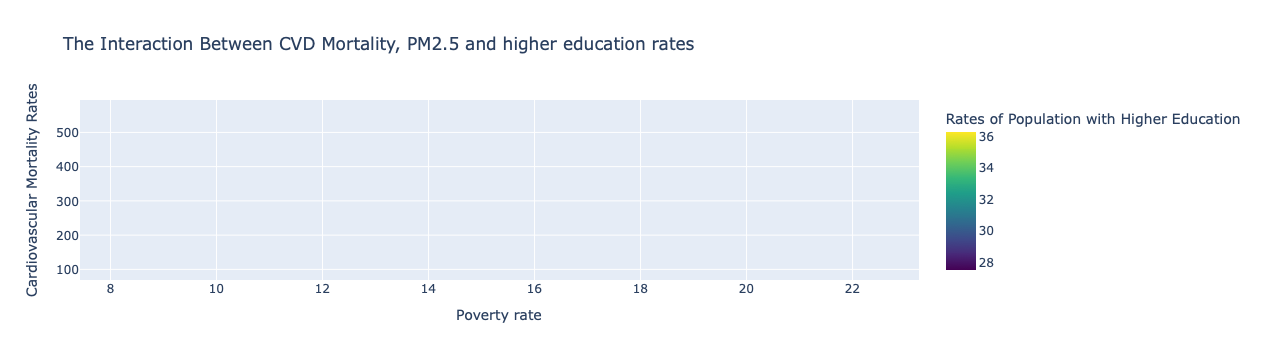

In [662]:
#  Plotly Scatter chart
import plotly.express as px 

fig = px.scatter (df_acs_pm25_cmr_ses_index_state_combined,
x='poverty_rate',
y = 'CMR' ,
color = 'education_percent_educated_18',
title = 'The Interaction Between CVD Mortality, Poverty rate and higher education rates',
labels={
"poverty_rate": "Poverty rate",
"CMR": "Cardiovascular Mortality Rates",
"education_percent_educated_18": "Rates of Population with Higher Education "
},
color_continuous_scale=px. colors. sequential.Viridis)
fig. show()

In [ ]:
This visualization provides a matrix of plots, examining how different socioeconomic factors (Poverty, Higher education, Health insurance) relate to CMR.
The relationships suggest that higher education and lower poverty rates may be associated with decreased CMR.

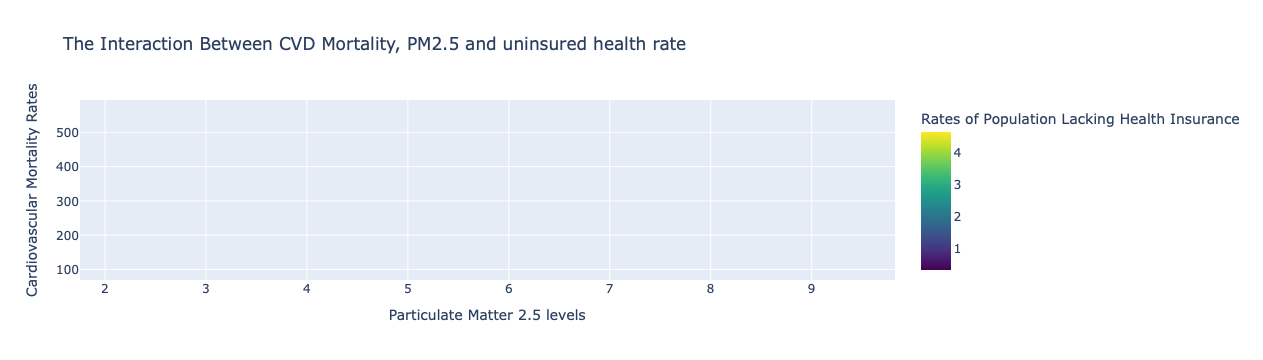

In [447]:
#  Plotly Scatter chart
import plotly.express as px 

fig = px.scatter (df_acs_pm25_cmr_ses_index_state_combined,
x='PM2.5',
y = 'CMR' ,
color = 'uninsured_rate',
title = 'The Interaction Between CVD Mortality, PM2.5 and uninsured health rate',
labels={
"PM2.5": "Particulate Matter 2.5 levels",
"CMR": "Cardiovascular Mortality Rates",
"uninsured_rate": "Rates of Population Lacking Health Insurance "
},
color_continuous_scale=px. colors. sequential.Viridis)
fig. show()

#Analysis for Selected Sample States (DC, MD, VA, WV, PA, DE, MN, NY, NJ, TX,OH)

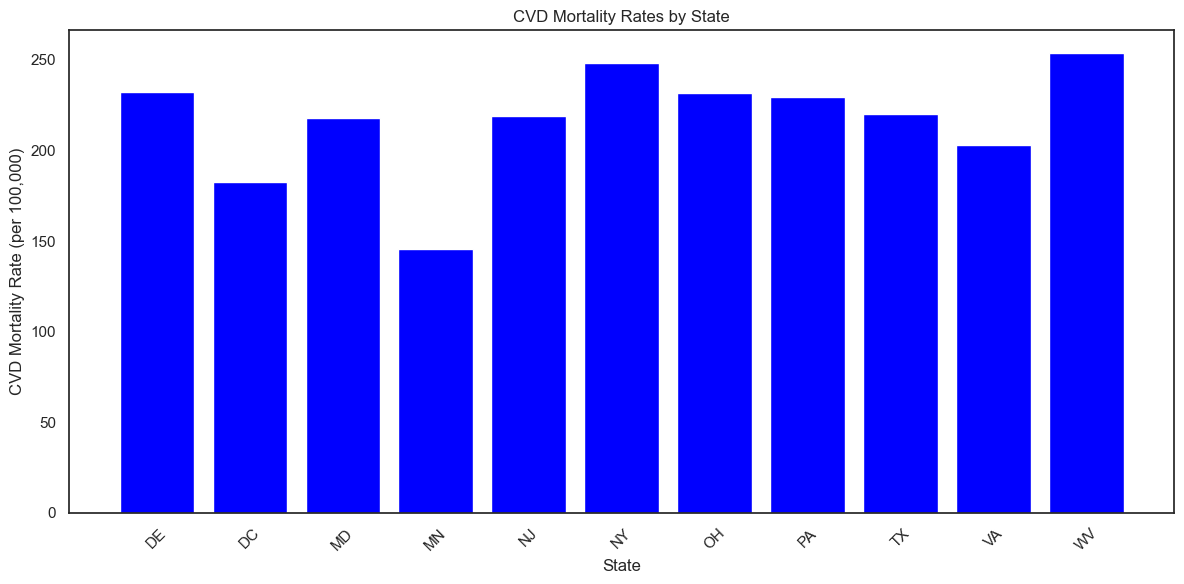

In [397]:
# CVD Mortality Rates by Selected Sample States
states = ['DC', 'MD', 'VA', 'WV', 'PA', 'DE', 'MN', 'NY', 'NJ', 'TX', 'OH']
cvd_mortality_rates = df_cvd_htn_mort_combined_reup[df_cvd_htn_mort_combined_reup['state'].isin(states)]
plt.figure(figsize=(12, 6))
plt.bar(cvd_mortality_rates['state'], cvd_mortality_rates['Cvdmortrate'], color='blue')
plt.xlabel('State')
plt.ylabel('CVD Mortality Rate (per 100,000)')
plt.title('CVD Mortality Rates by State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Hypertension Mortality Rates by State 
htn_mortality_rates = df_cvd_htn_mort_combined_reup[df_cvd_htn_mort_combined_reup['state'].isin(states)]
plt.figure(figsize=(12, 6))
plt.bar(htn_mortality_rates['state'], htn_mortality_rates['Htndxdeathrate'],color='lightcoral')
plt.xlabel('State')
plt.ylabel('Hypertension Mortality Rate (per 100,000)')
plt.title('Hypertension Mortality Rates by State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

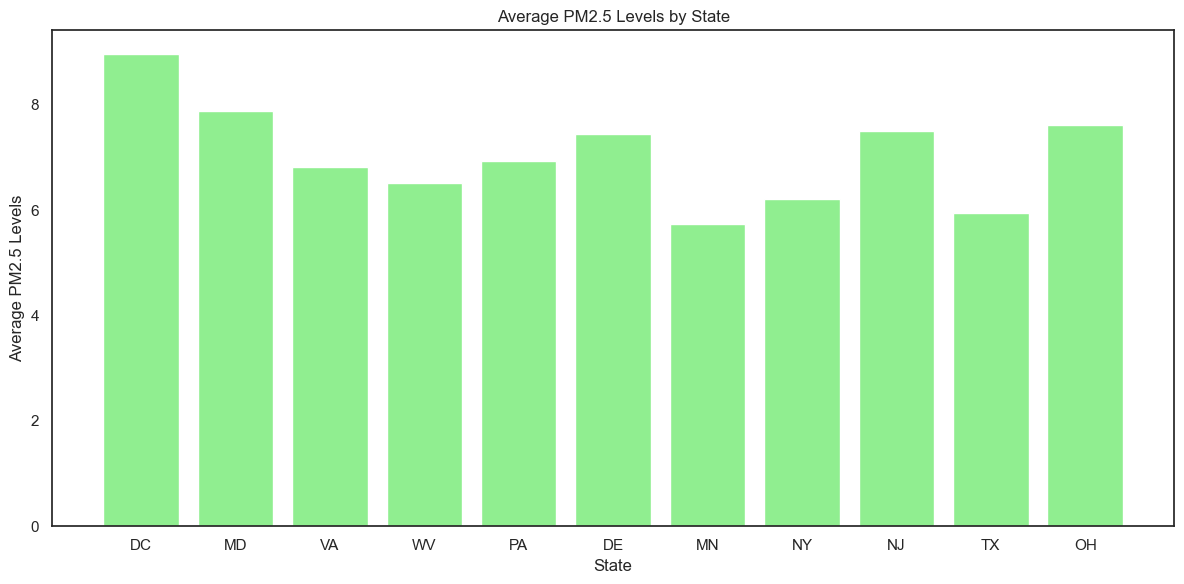

In [399]:
# Average PM2.5 Levels by State 
pm25_by_state = df_annualstate_county_pm25_cmr.groupby('state')['PM2.5'].mean().loc[states]
plt.figure(figsize=(12, 6))
plt.bar(pm25_by_state.index, pm25_by_state.values, color='lightgreen')
plt.xlabel('State')
plt.ylabel('Average PM2.5 Levels')
plt.title('Average PM2.5 Levels by State')
plt.tight_layout()
plt.show()

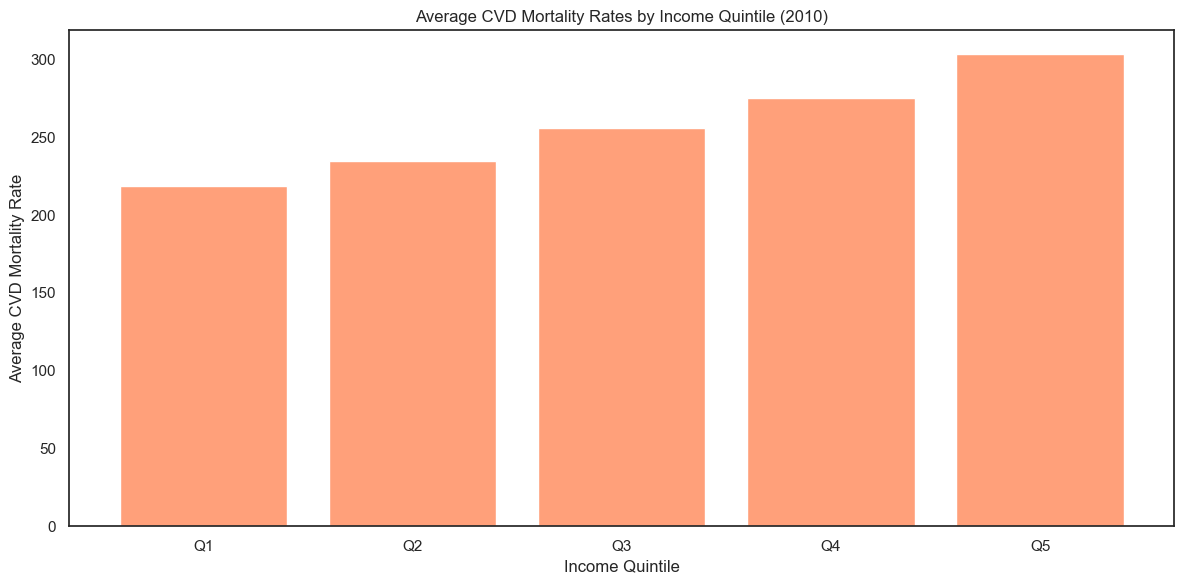

In [400]:
#CVD Mortality Rates by Income Quintile
income_quintiles = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']
cvd_mortality_by_quintile = df_merged_state_county.groupby('SES_quintile_2010')['CMR'].mean().loc[income_quintiles]
plt.figure(figsize=(12, 6))
plt.bar(cvd_mortality_by_quintile.index, cvd_mortality_by_quintile.values, color='lightsalmon')
plt.xlabel('Income Quintile')
plt.ylabel('Average CVD Mortality Rate')
plt.title('Average CVD Mortality Rates by Income Quintile (2010)')
plt.tight_layout()
plt.show()

<Figure size 1500x800 with 0 Axes>

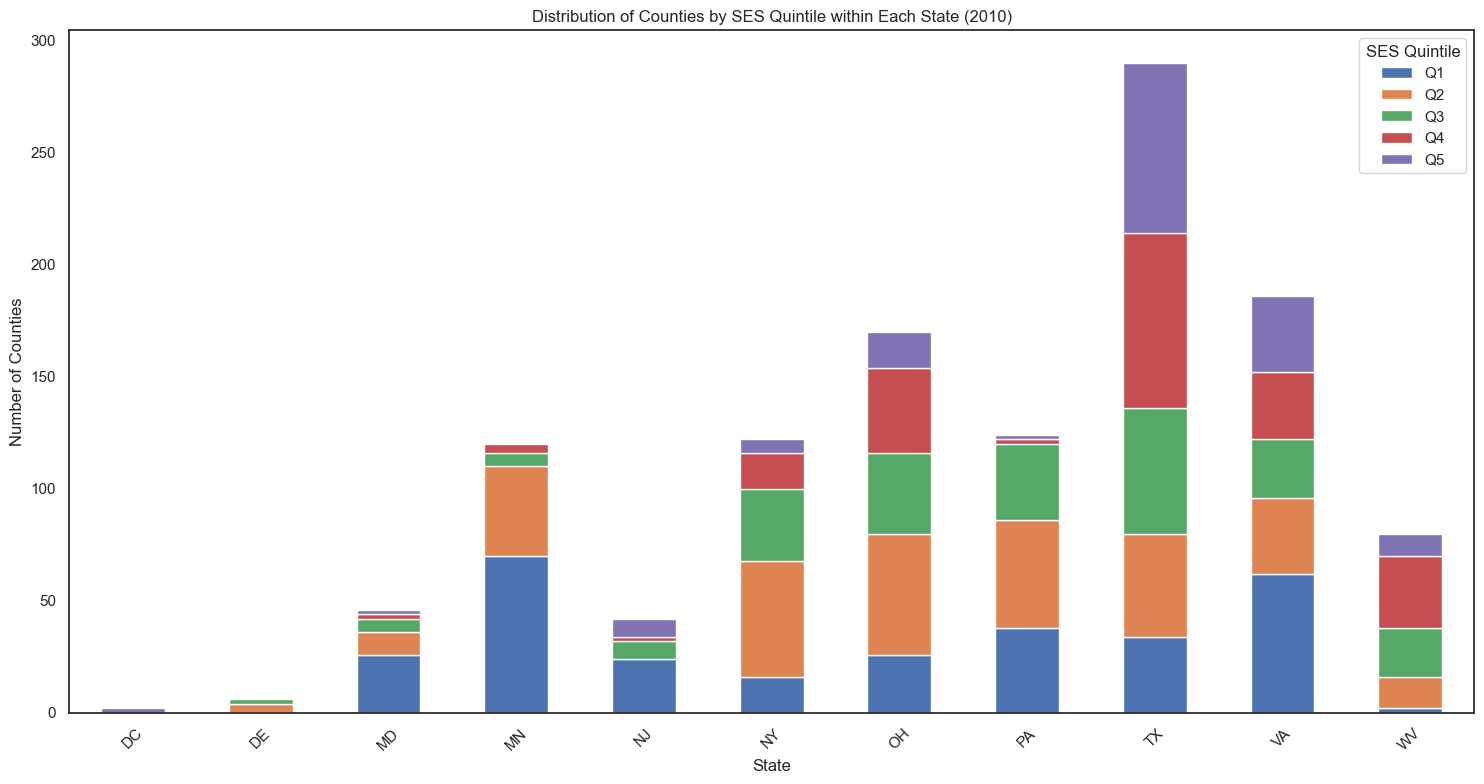

In [402]:
# States of interest
states = ['DC', 'MD', 'VA', 'WV', 'PA', 'DE', 'MN', 'NY', 'NJ', 'TX', 'OH']
df_filtered = df_merged_state_county[df_merged_state_county['state'].isin(states)]

# 1. Distribution of Counties within States (Stacked)
plt.figure(figsize=(15, 8))
quintile_counts = df_filtered.groupby(['state', 'SES_quintile_2010']).size().unstack(fill_value=0)
quintile_counts.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Distribution of Counties by SES Quintile within Each State (2010)')
plt.xlabel('State')
plt.ylabel('Number of Counties')
plt.xticks(rotation=45)
plt.legend(title='SES Quintile')
plt.tight_layout()
plt.show()

### How does hypertension prevalence impact cardiovascular mortality rates in some U.S. states?

In [608]:
df_cvd_htn_mort_combined_reup_clean=df_cvd_htn_mort_combined_reup.drop(columns=['URL_cvdmort', 'URL_htnmort'])

df_cvd_htn_mort_combined_reup_clean.tail()

YEAR state  Cvdmortrate  Cvddeathcount  Htndxdeathrate  Htndxdeathcount
496  2005    VA        203.0          14192             7.9              549
497  2005    WA        180.5          10985             7.5              452
498  2005    WV        253.6           5538            11.6              253
499  2005    WI        190.6          11842             7.1              451
500  2005    WY        188.3            952             3.9               20

In [614]:
#Correlation Analysis
df_cvd_htn_mort_combined_reup_cleanCorr = df_cvd_htn_mort_combined_reup_clean[['Cvdmortrate', 'Htndxdeathrate']].corr()
df_cvd_htn_mort_combined_reup_cleanCorr

from scipy.stats import pearsonr
#Pearson correlation and p-value
corr_coef, p_value = pearsonr(df_cvd_htn_mort_combined_reup_clean['Cvdmortrate'], df_cvd_htn_mort_combined_reup_clean['Htndxdeathrate'])

corr_coef,p_value

(0.2952786039775407, 1.5444236806717292e-11)

This suggests a weak positive relationship between Particulate matter 2.5ug levels and Cardiomortality rate with higher PM2.5 levels being associated with higher cardiovascular mortality rates though other factors may also have a strong influence too on CMR.

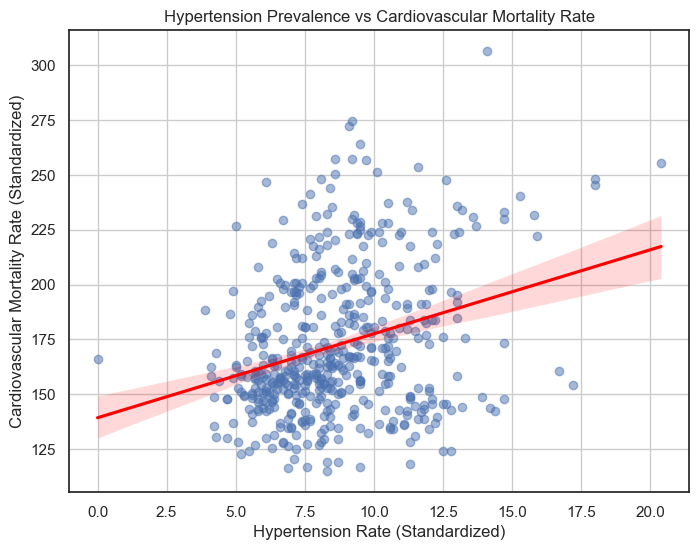

In [616]:
# Scatter Plot: Hypertension Prevalence vs Cardiovascular Mortality Rate
plt.figure(figsize=(8,6))
sns.regplot(data=df_cvd_htn_mort_combined_reup_clean, x="Htndxdeathrate", y="Cvdmortrate", scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Hypertension Prevalence vs Cardiovascular Mortality Rate")
plt.xlabel("Hypertension Rate (Standardized)")
plt.ylabel("Cardiovascular Mortality Rate (Standardized)")
plt.grid(True)
plt.show()

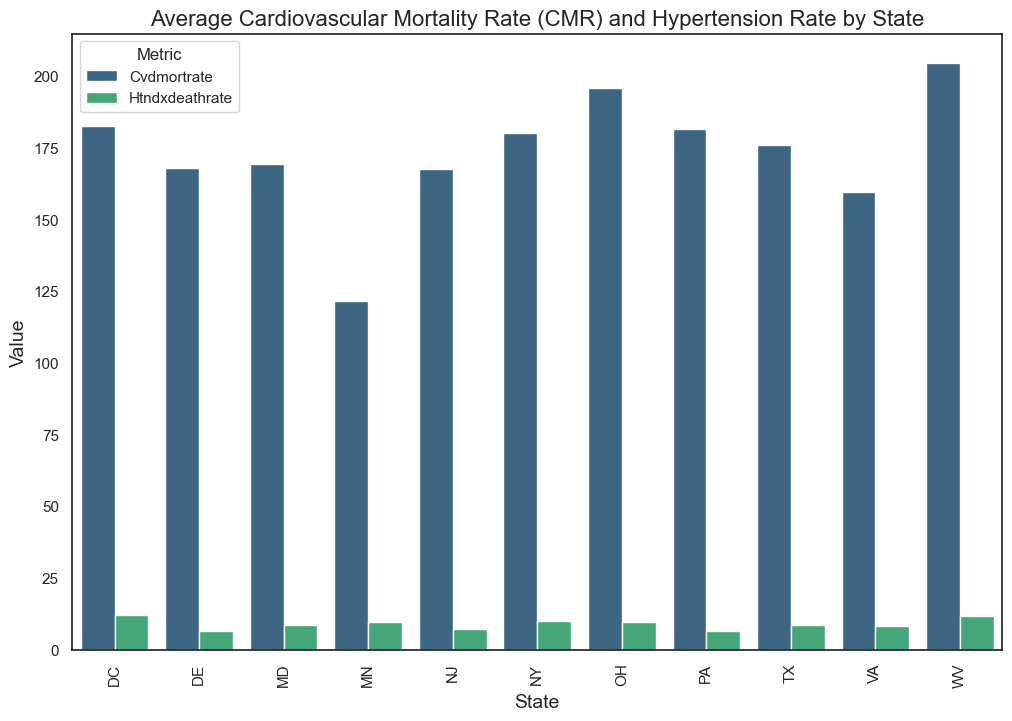

In [644]:
# States of interest
states = ['DC', 'MD', 'VA', 'WV', 'PA', 'DE', 'MN', 'NY', 'NJ', 'TX', 'OH']
df_filtered = df_cvd_htn_mort_combined_reup[df_cvd_htn_mort_combined_reup['state'].isin(states)]

# Group by state and calculate mean CMR and Hypertension Rate
df_grouped = df_filtered.groupby('state')[['Cvdmortrate', 'Htndxdeathrate']].mean().reset_index()

# Join the grouped dataframe for plotting
df_melted = df_grouped.melt(
    id_vars=['state'], 
    value_vars=['Cvdmortrate', 'Htndxdeathrate'],  
    var_name='Metric', 
    value_name='Value'
)

# Create a side-by-side bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x='state',
    y='Value',
    hue='Metric',  
    data=df_melted,
    palette='viridis'
)
plt.title('Average Cardiovascular Mortality Rate (CMR) and Hypertension Rate by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.xticks(rotation=90)
plt.legend(title='Metric')
plt.show()

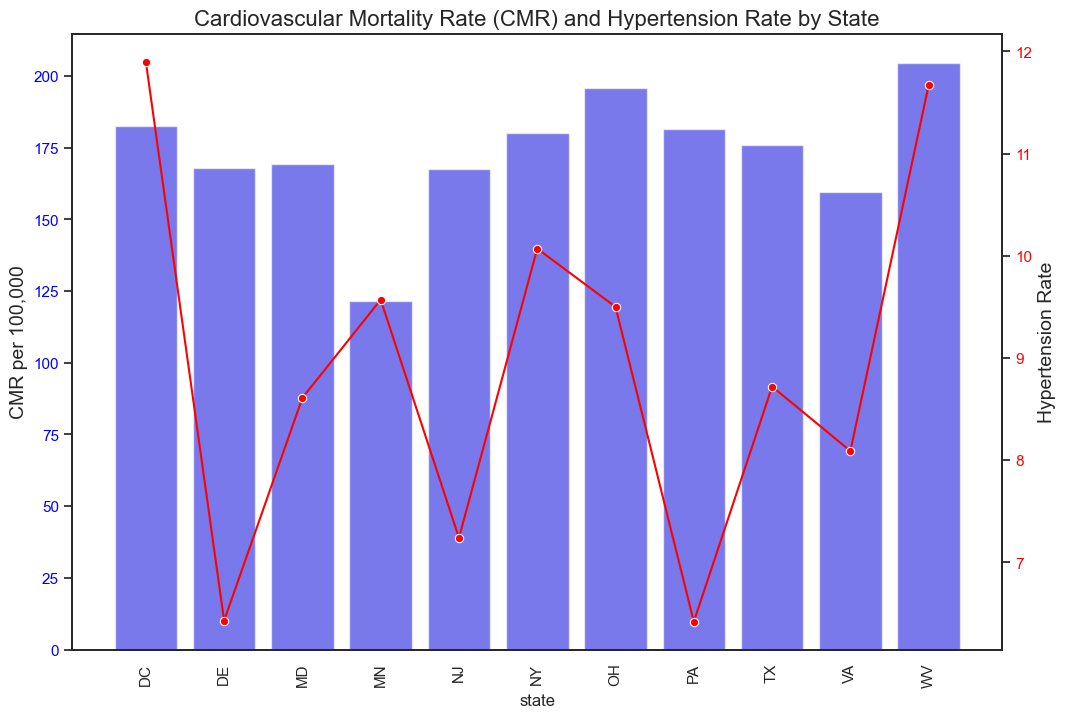

In [646]:
# States of interest
states = ['DC', 'MD', 'VA', 'WV', 'PA', 'DE', 'MN', 'NY', 'NJ', 'TX', 'OH']
df_filtered = df_cvd_htn_mort_combined_reup[df_cvd_htn_mort_combined_reup['state'].isin(states)]

# Group by state and calculate mean CMR and Hypertension Rate
df_grouped = df_filtered.groupby('state')[['Cvdmortrate', 'Htndxdeathrate']].mean().reset_index()

# Create plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# CMR on the first y-axis
sns.barplot(
    x='state',
    y='Cvdmortrate',
    data=df_grouped,
    color='blue',
    alpha=0.6,
    ax=ax1
)
ax1.set_ylabel('CMR per 100,000', fontsize=14)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(df_grouped['state'], rotation=90)

# Second y-axis for Hypertension Rate
ax2 = ax1.twinx()
sns.lineplot(
    x='state',
    y='Htndxdeathrate',
    data=df_grouped,
    color='red',
    marker='o',
    ax=ax2
)
ax2.set_ylabel('Hypertension Rate', fontsize=14)
ax2.tick_params(axis='y', labelcolor='red')

# title and labels
plt.title('Cardiovascular Mortality Rate (CMR) and Hypertension Rate by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.show()

Multiple Regression Analysis: The regression results quantify how various factors contribute to health outcomes. This approach could be adapted for breast cancer risk modeling to assess whether adding imaging biomarkers improves prediction performance.

Multiple Regression Analysis: The regression results quantify how various factors contribute to CMR.

In [619]:
# independent and dependent variables
X = df_cvd_htn_mort_combined_reup_clean[['Htndxdeathrate']]  
y = df_cvd_htn_mort_combined_reup_clean['Cvdmortrate']  

import statsmodels.api as sm
# intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display summary statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Cvdmortrate   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     47.66
Date:                Wed, 05 Mar 2025   Prob (F-statistic):           1.54e-11
Time:                        17:41:17   Log-Likelihood:                -2434.0
No. Observations:                 501   AIC:                             4872.
Df Residuals:                     499   BIC:                             4880.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            139.2546      4.984     27.940      0.000     129.462     149.047
Htndxdeathrate     3.8284      0.555      6.904      0.000       2.739       4.918
==============================================================================
Omnibus:                       30.390   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.272
Skew:                           0.629   Prob(JB):                     3.61e-08
Kurtosis:                       3.248   Cond. No.                         32.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model shows a statistically significant relationship between Hypertension-related death rate and Cardiovascular mortality rate. The positive and significant coefficient for Hypertension-related death rates suggests that higher hypertension-related death rates are associated with higher cardiovascular mortality rates and this gives some insight on the impact of hypertension prevalence on cardiovascular mortality rates albeit the low r-squared value (0.087) indicates that while hypertension-related death rates are significant, they explain only a small portion (8.7%) of the variation in cardiovascular mortality rates.

This could mean that other factors like PM2.5 levels, socioeconomic factors are important and should be included as strong influences.

The visualizations in this paper effectively reflect the relationship between cardiovascular mortality rates (CMR), air pollution (PM2.5), and socioeconomic factors such as poverty, education, and healthcare access(health uninsurance rate). The correlation map and regression analysis confirm that both environmental and social determinants significantly contribute to variations in CMR across different U.S. states.
Higher PM2.5 exposure is associated with increased cardiovascular mortality, reinforcing concerns about air pollution's impact on heart disease.
Lower socioeconomic status (SES) groups experience higher CMR, highlighting the role of poverty and education disparities in cardiovascular health.


In [687]:
# X and Y variables
X_variable = 'CMR'
y_variables = ['poverty_rate', 'education_percent_educated_18', 'PM2.5']  

# Add a intercept to the independent variables
X = sm.add_constant(df_acs_pm25_cmr_ses_index_state_combined[y_variables])
y = df_acs_pm25_cmr_ses_index_state_combined[X_variable]

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    CMR   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     1084.
Date:                Fri, 14 Mar 2025   Prob (F-statistic):               0.00
Time:                        23:19:39   Log-Likelihood:                -45152.
No. Observations:                8528   AIC:                         9.031e+04
Df Residuals:                    8524   BIC:                         9.034e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

The model shows statistically significant relationships between all three independent variables and cardiovascular mortality rate. While higher poverty rates and pm2.5 levels are associated with higher cardiovascular mortality rate, higher education levels are associated with lower cardiovascular mortality rate but model explains only 27.6% of the variance in cardiovascular mortality rate. The model also presents possible multi-collinearity issues.
